In [3]:
# 数値計算とデータ操作
import numpy as np
import pandas as pd

# 機械学習
from sklearn import datasets, preprocessing, model_selection, metrics
import xgboost as xgb
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
import torch
import torchvision

# 統計モデリング
import statsmodels.api as sm

# データ可視化
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

# 科学計算
import scipy

# 金融データの取得
import ccxt

2024-09-26 13:44:26.537740: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 13:44:26.783944: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 13:44:26.841296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 13:44:27.213199: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 13:44:28.928013: W tensorflow/compiler/tf2

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [4]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta

# Binanceのインスタンスを作成
exchange = ccxt.binance()

# BTC/USDTのデータを取得
symbol = 'BTC/USDT'
timeframe = '1h'  # 1時間足のデータ
since = exchange.parse8601('2018-01-01T00:00:00Z')  # データの開始日

# データを取得する関数
def fetch_all_ohlcv(symbol, timeframe, since):
    all_ohlcv = []
    now = exchange.milliseconds()
    while since < now:
        try:
            ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since)
            if not ohlcv:
                break
            since = ohlcv[-1][0] + 1  # タイムスタンプを更新
            all_ohlcv.extend(ohlcv)
        except Exception as e:
            print(f'An error occurred: {e}')
            break
    return all_ohlcv

# データを取得
ohlcv = fetch_all_ohlcv(symbol, timeframe, since)
data = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# タイムスタンプを変換
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')

# CSVファイルとして保存
data.to_csv('btc_usdt_1h_2018_to_now.csv', index=False)

print('Data fetching and saving completed.')

Data fetching and saving completed.


In [5]:
df = pd.read_csv("btc_usdt_1h_2018_to_now.csv")

Done! Use 'show' commands to display/save.   |█| [100%]   00



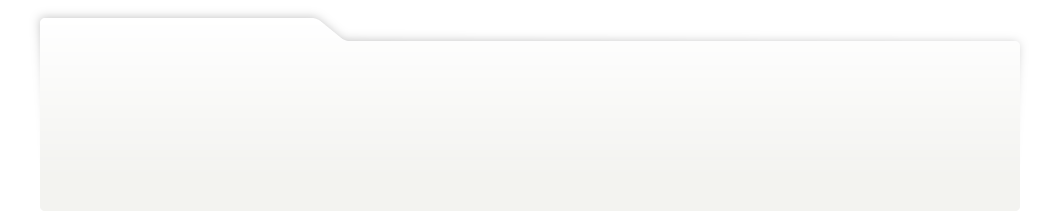
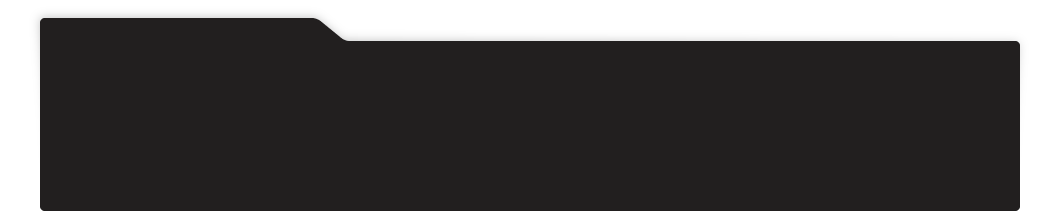
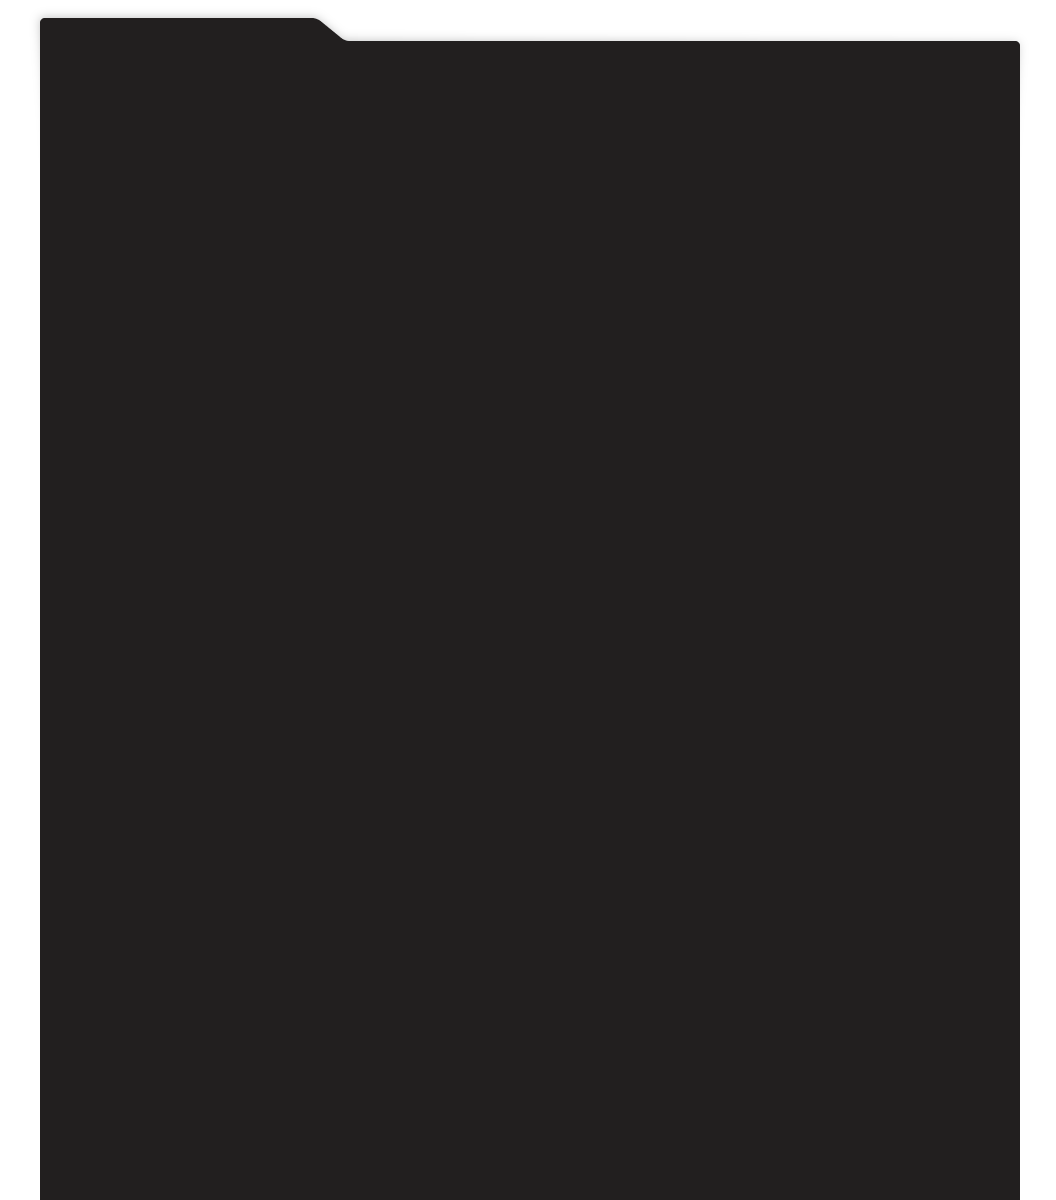
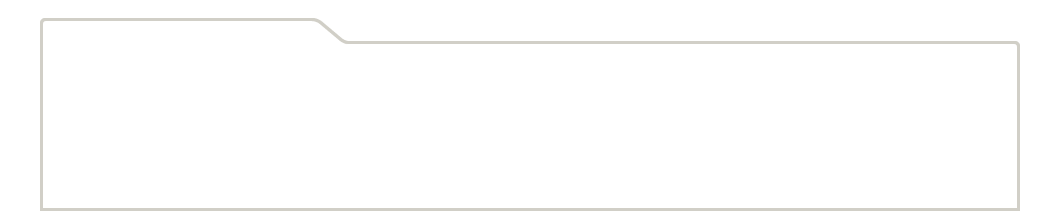
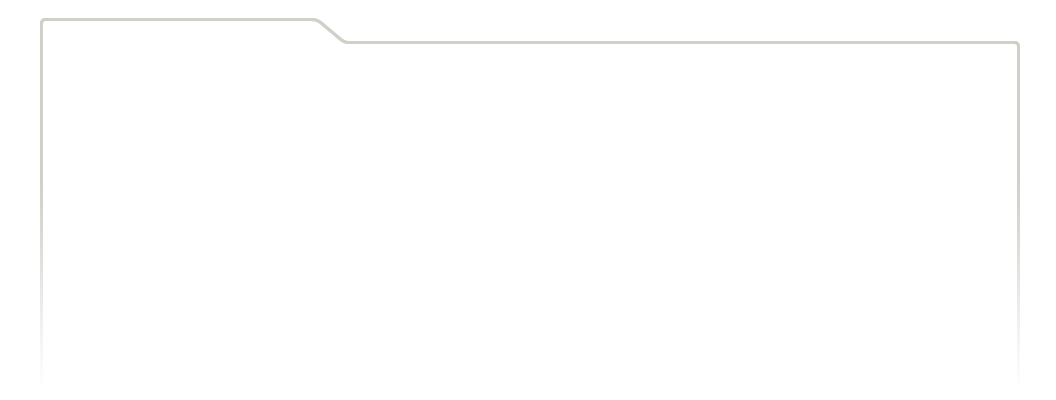
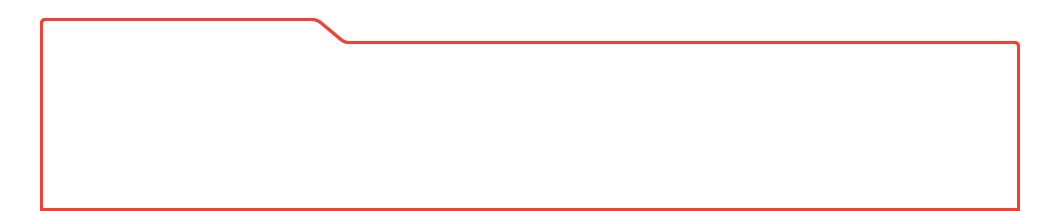
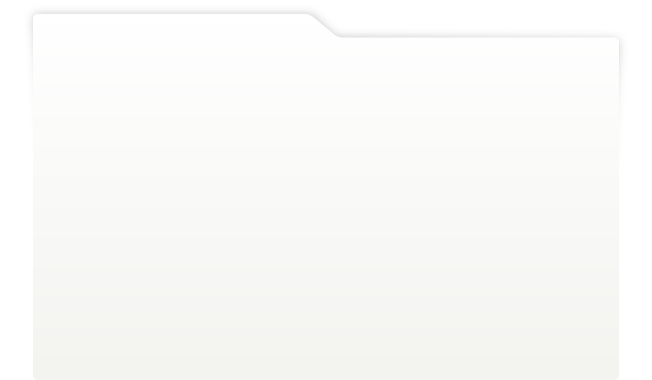
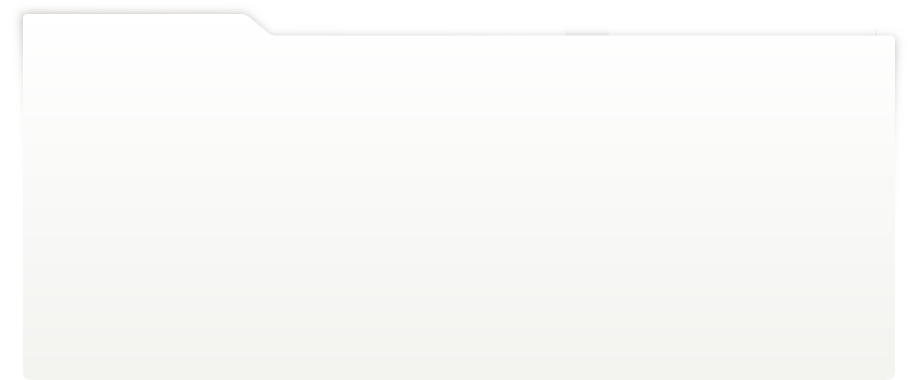
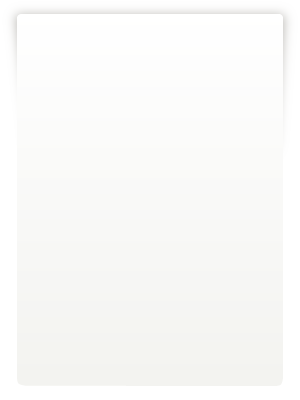
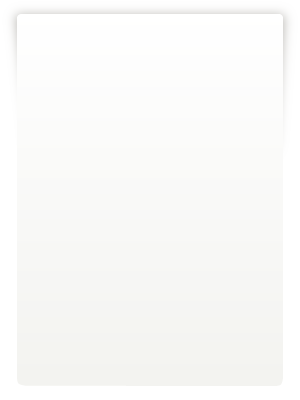
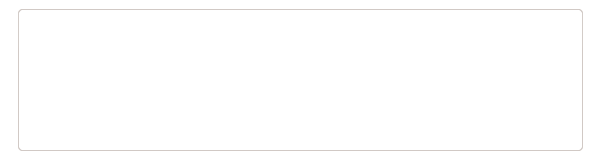
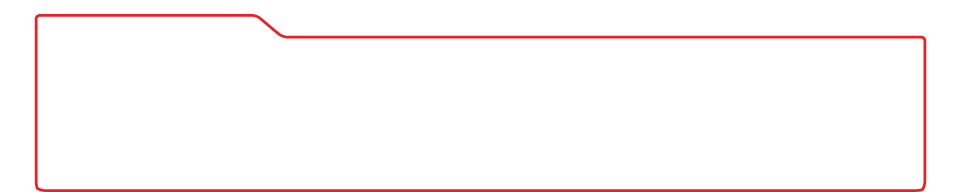
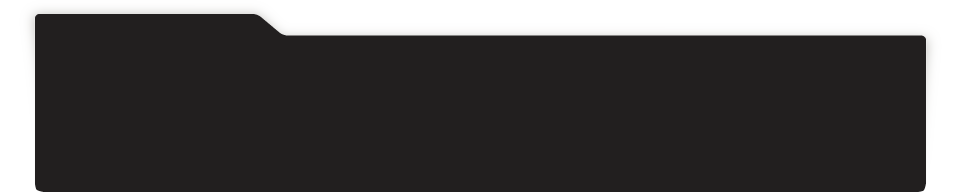
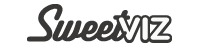
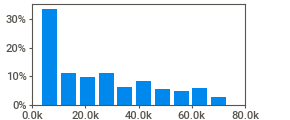
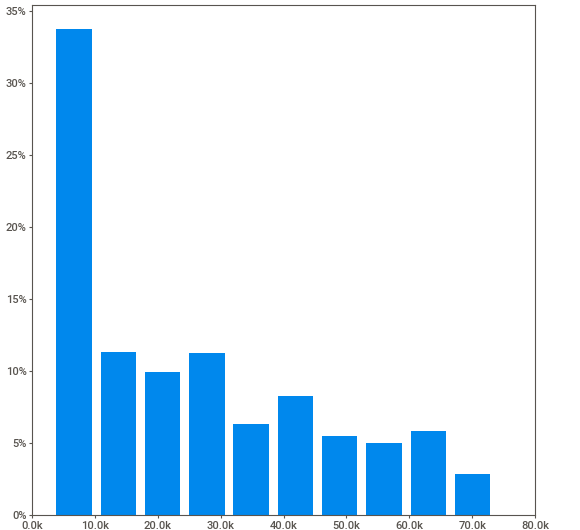
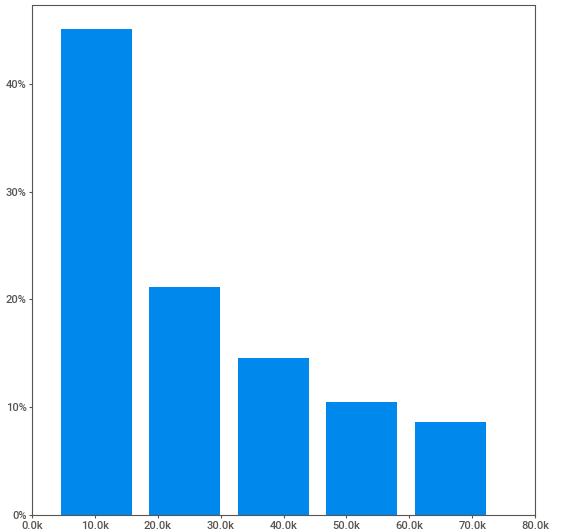
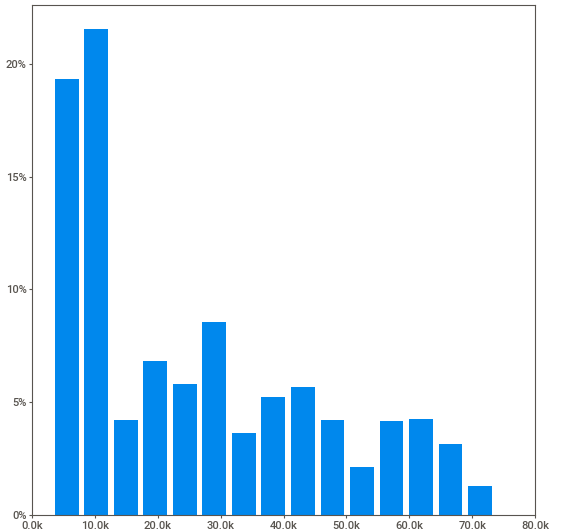
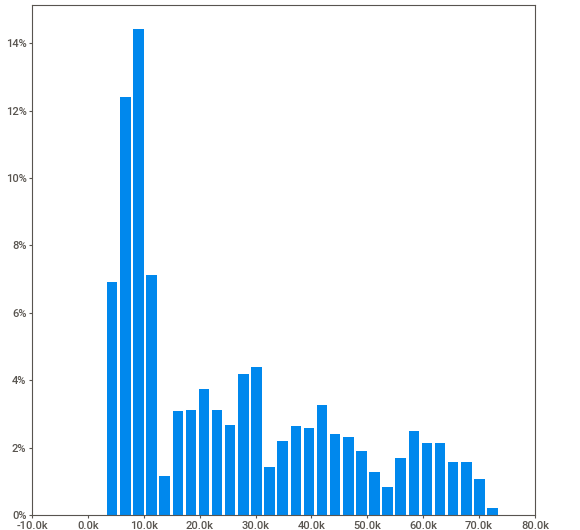
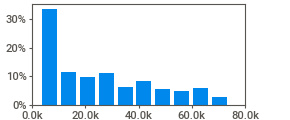
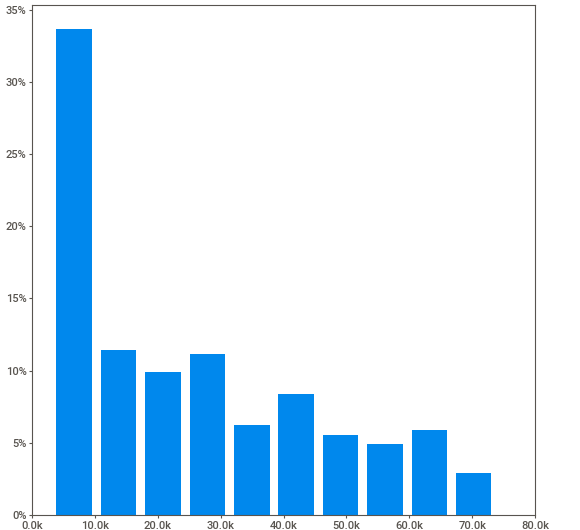
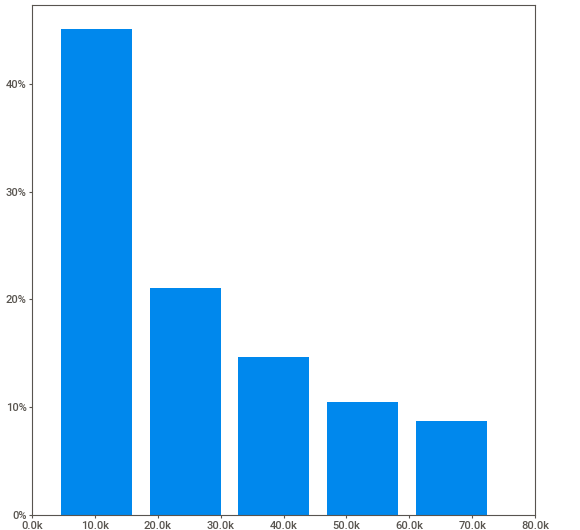
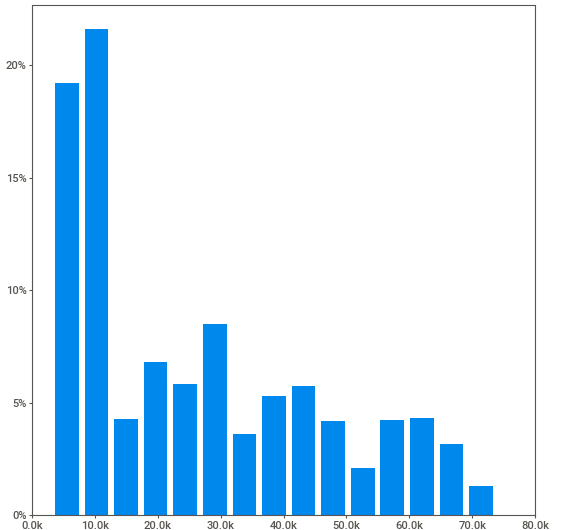
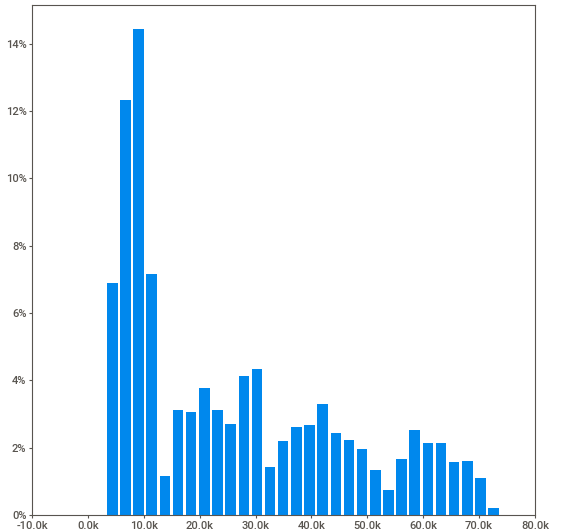
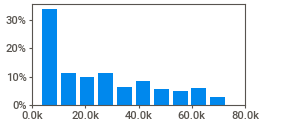
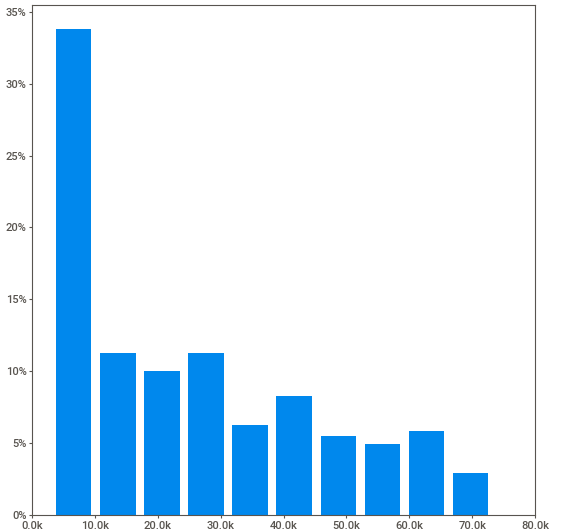
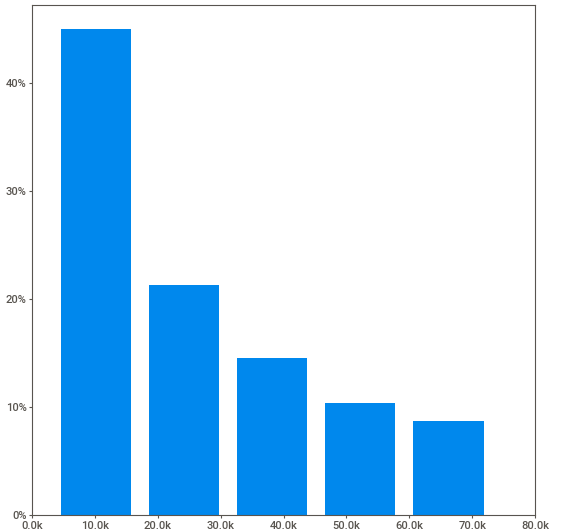
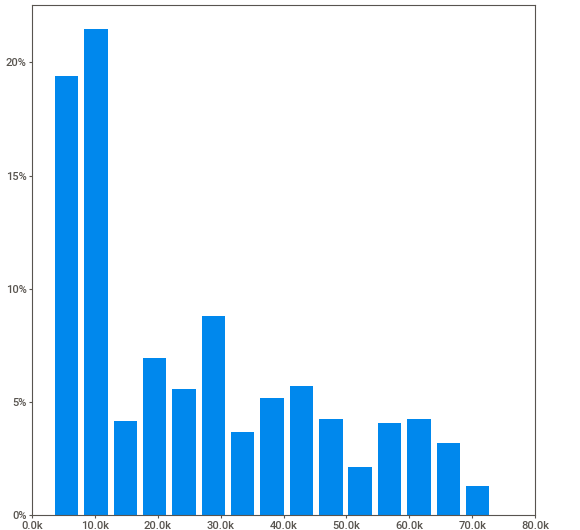
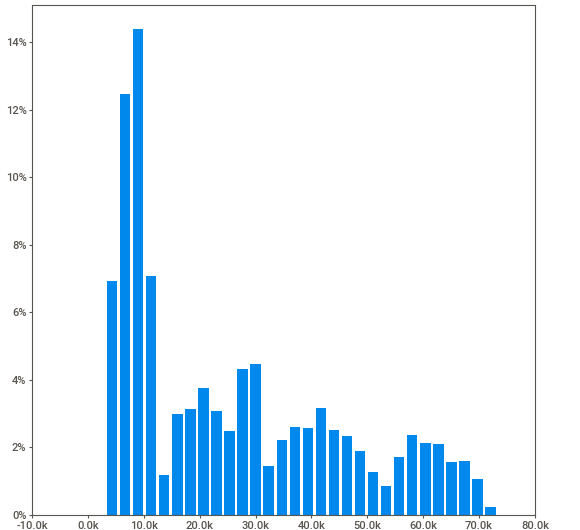
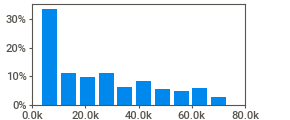
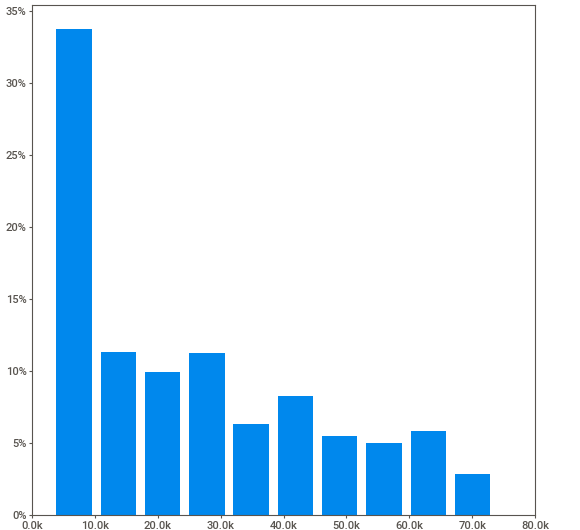
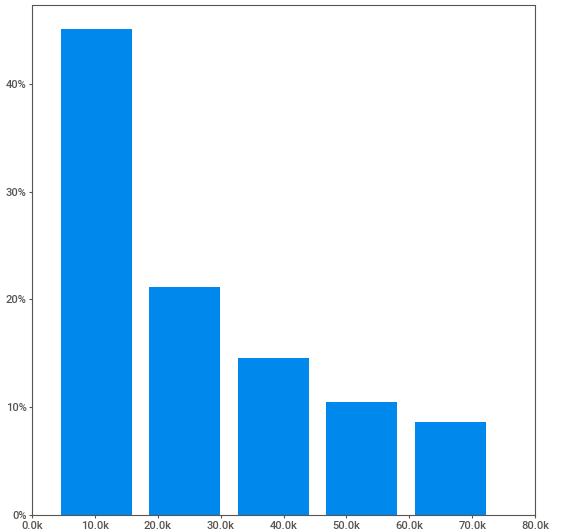
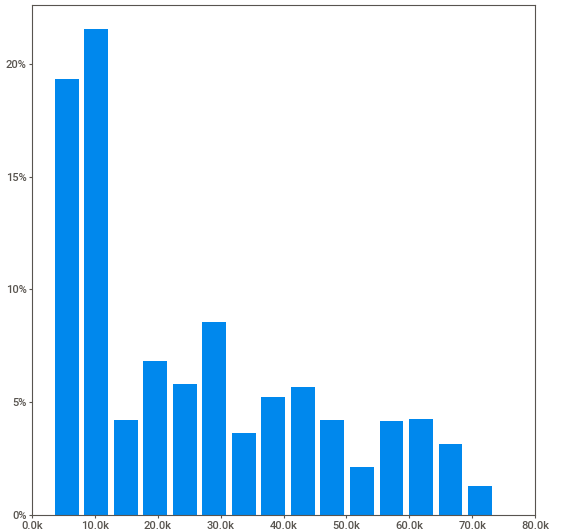
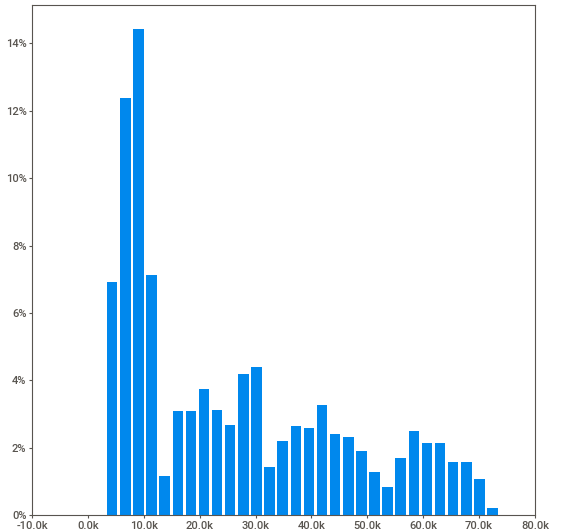
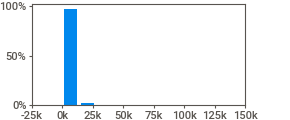
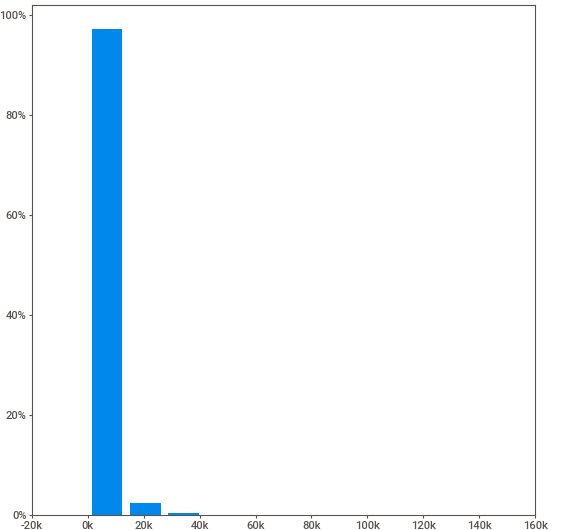
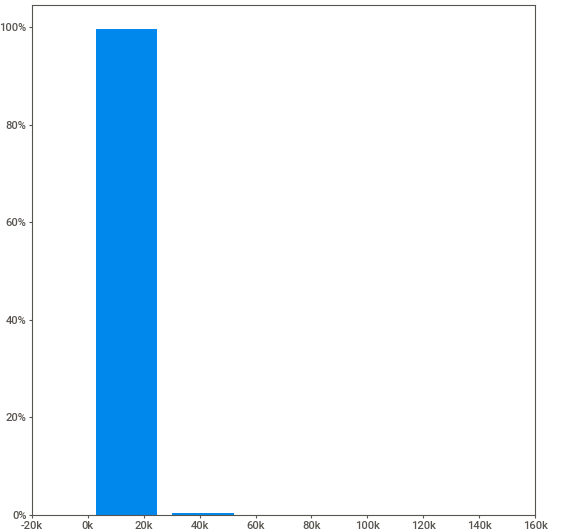
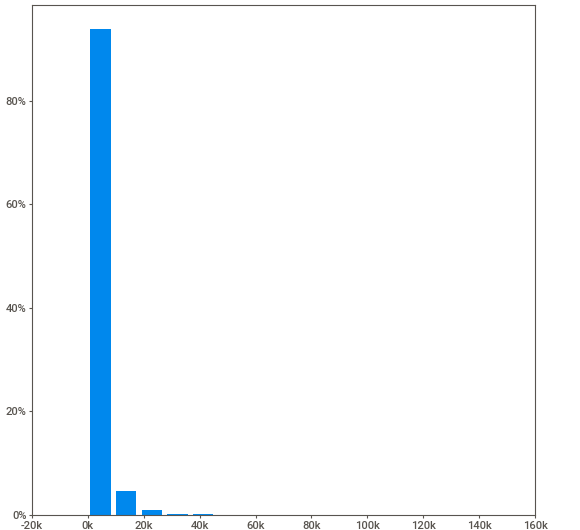
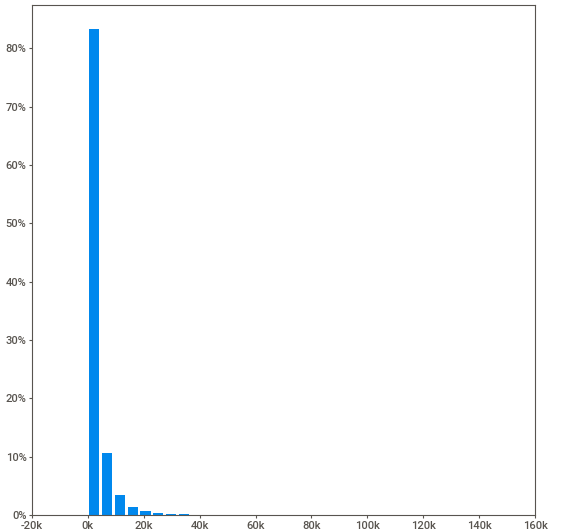
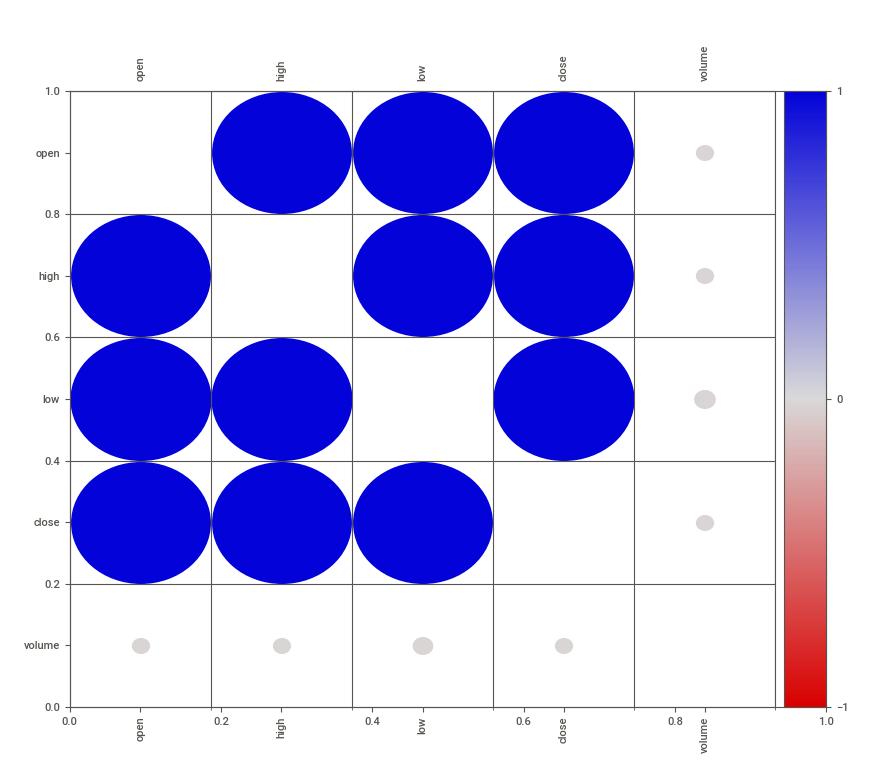
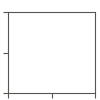

In [6]:
# レポートの生成
report = sv.analyze(df)
report.show_notebook()

Done! Use 'show' commands to display/save.   |█| [100%]   00



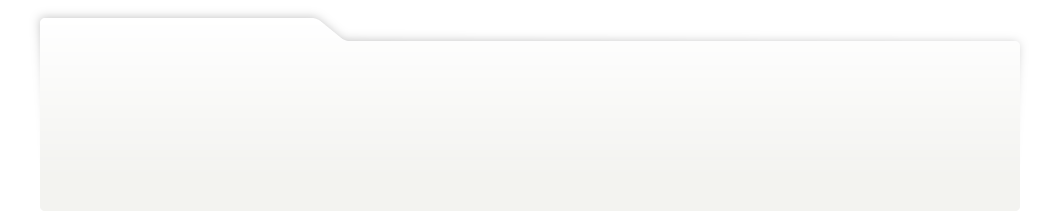
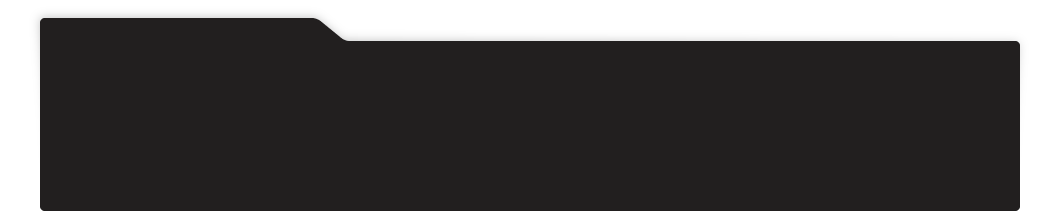
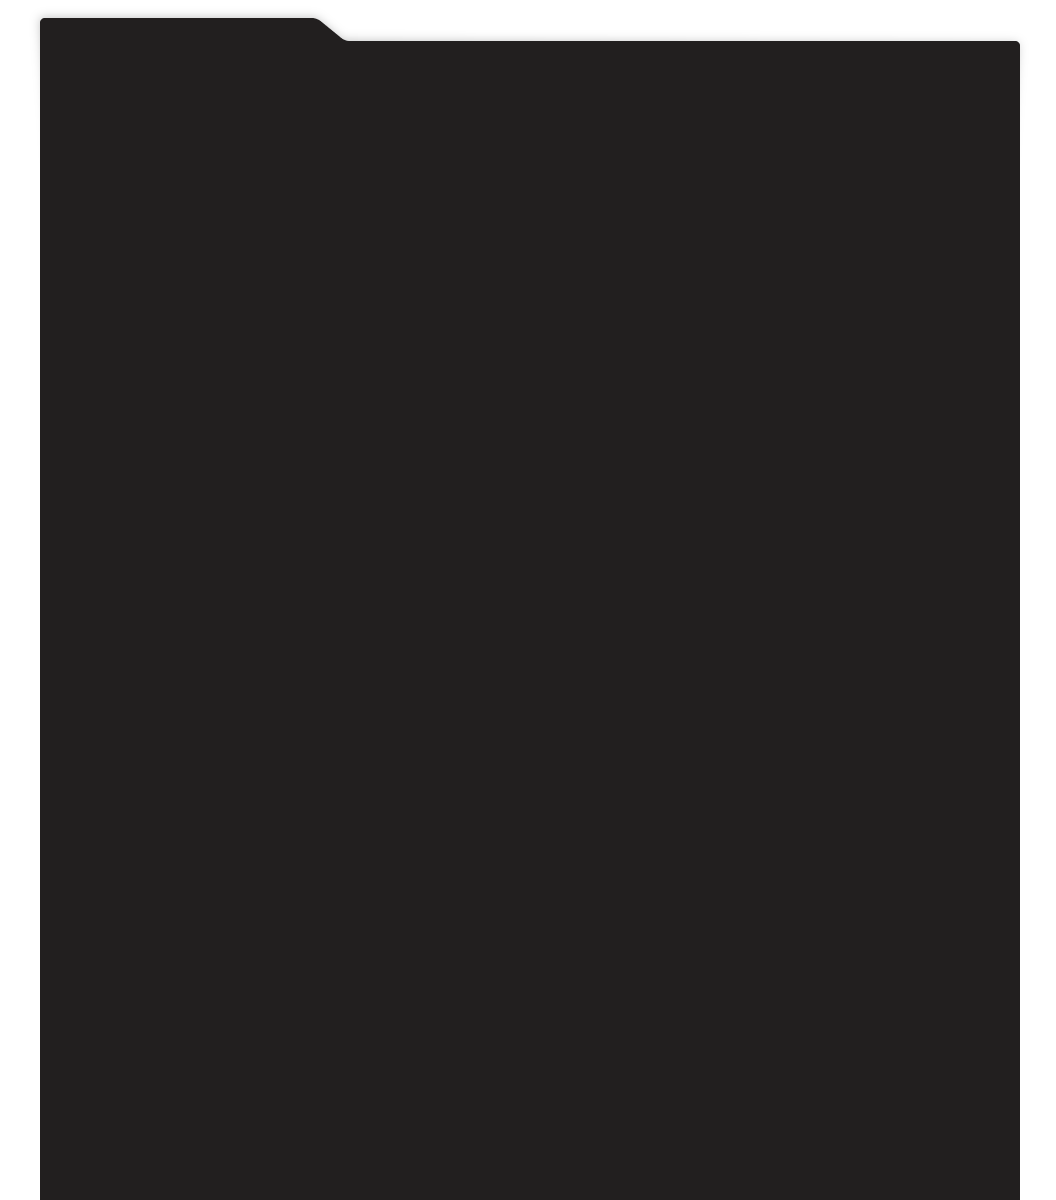
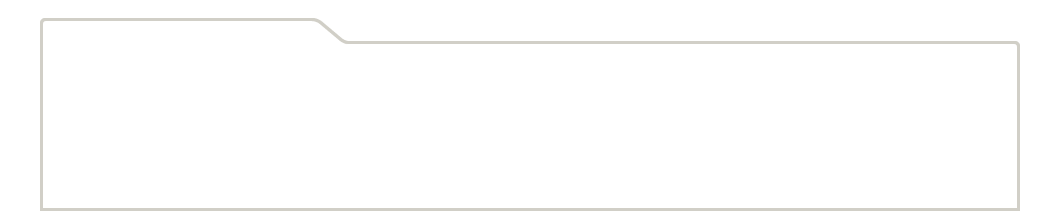
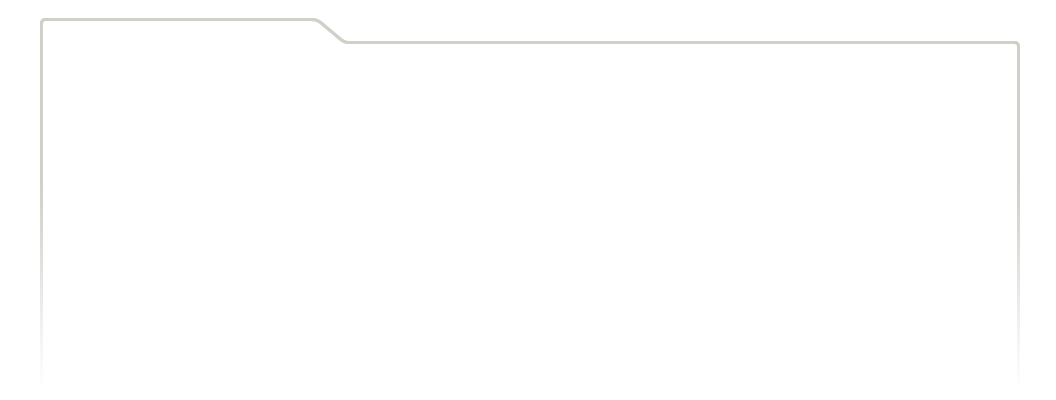
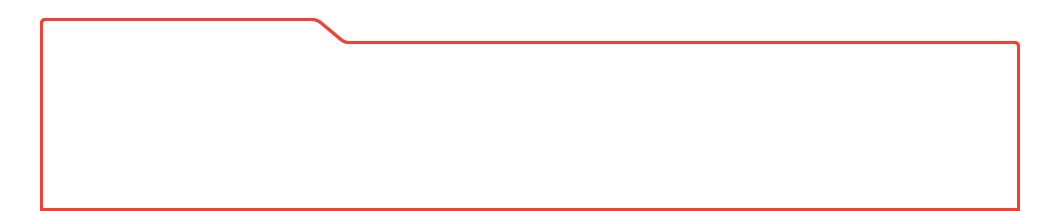
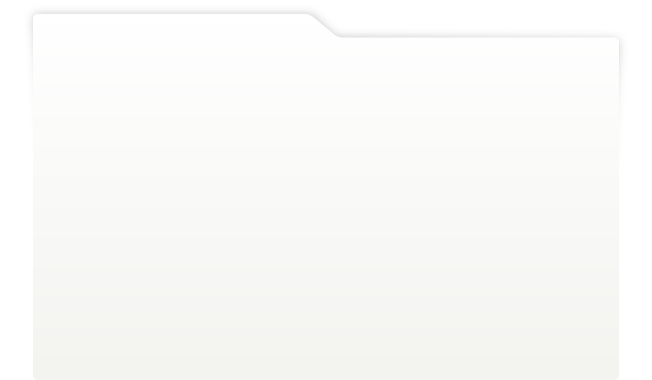
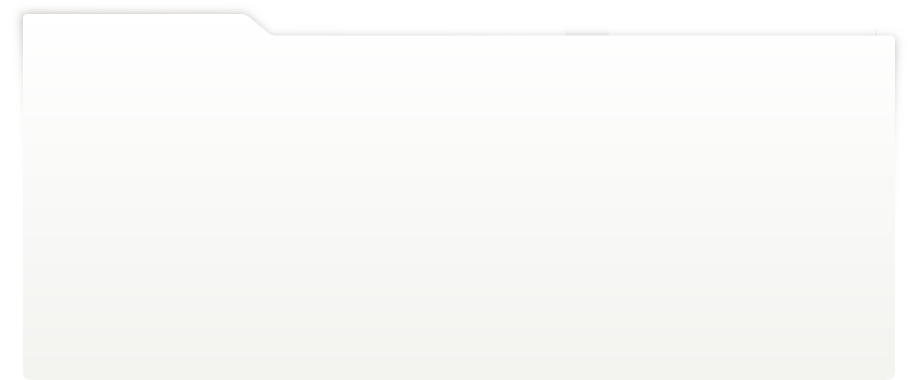
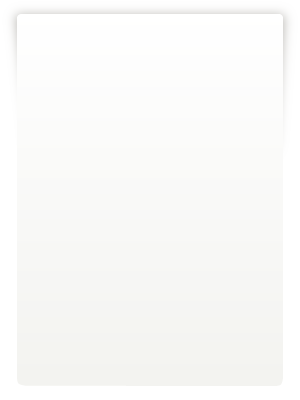
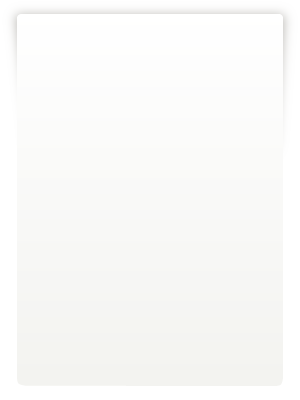
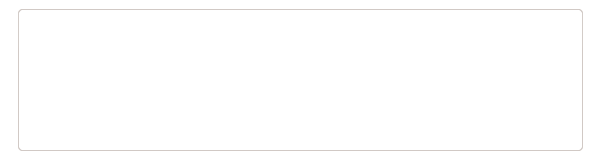
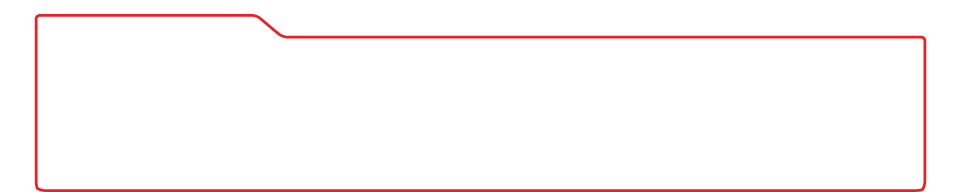
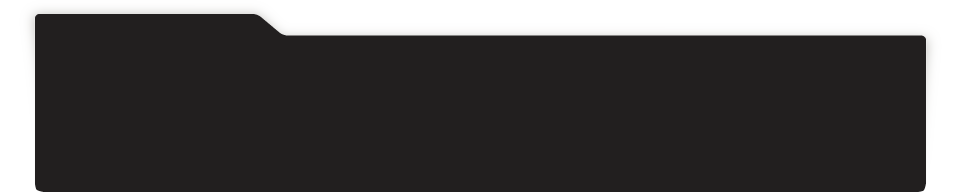
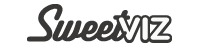
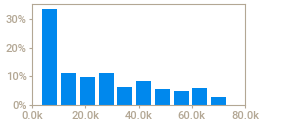
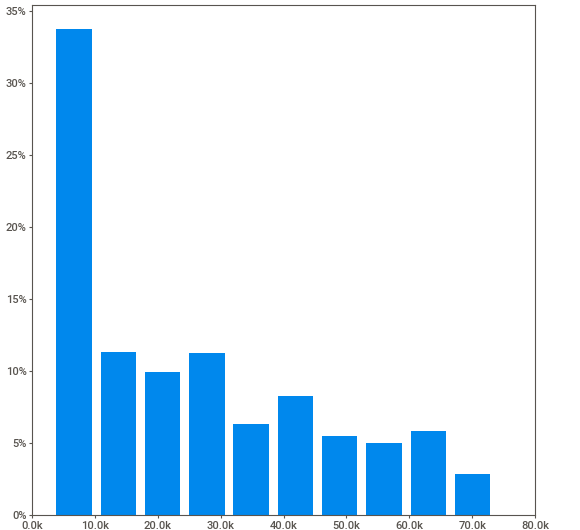
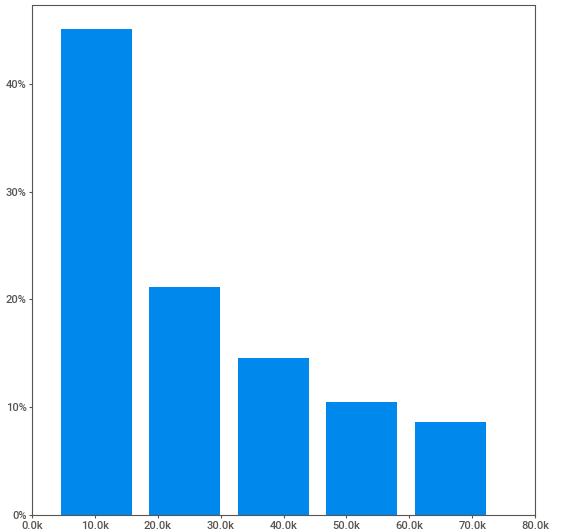
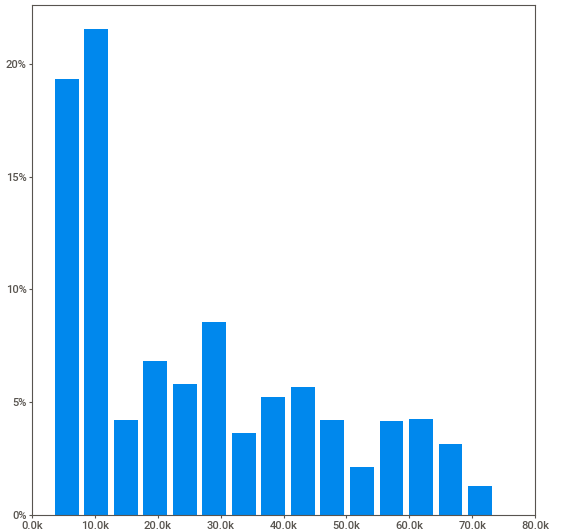
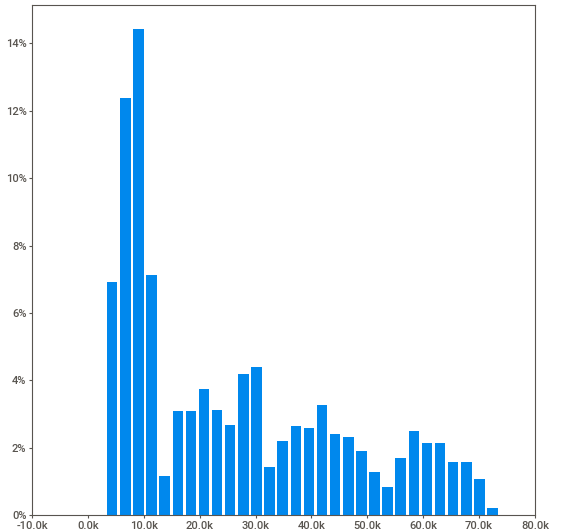
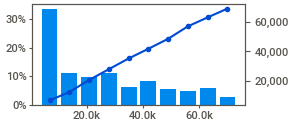
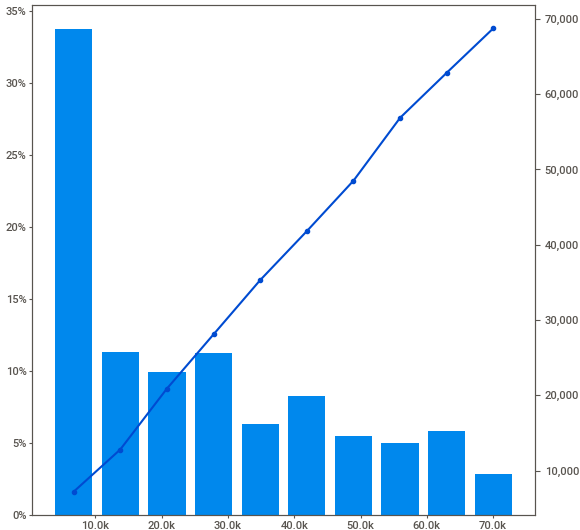
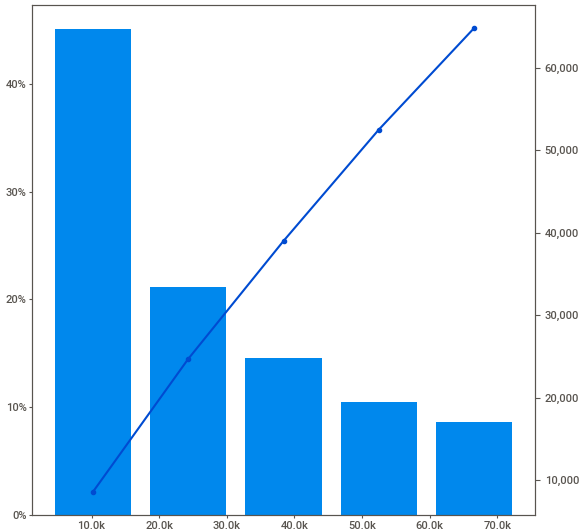
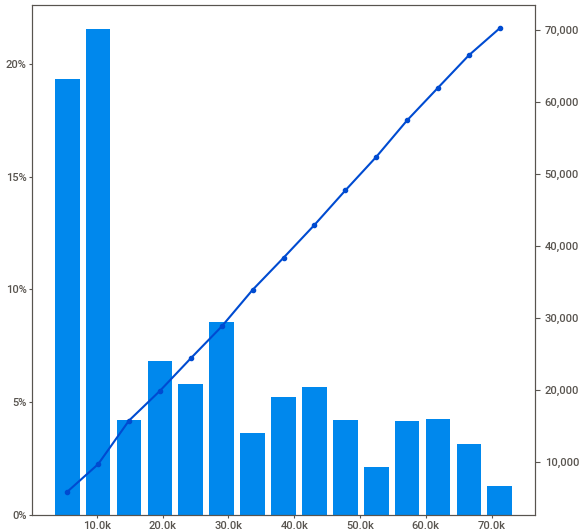
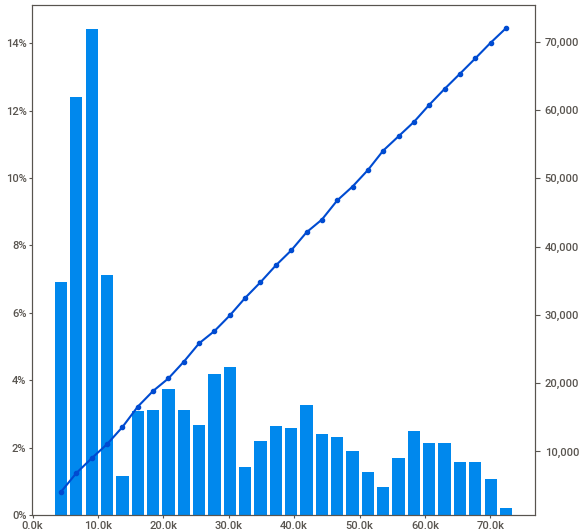
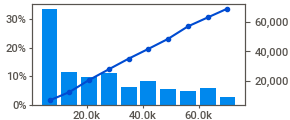
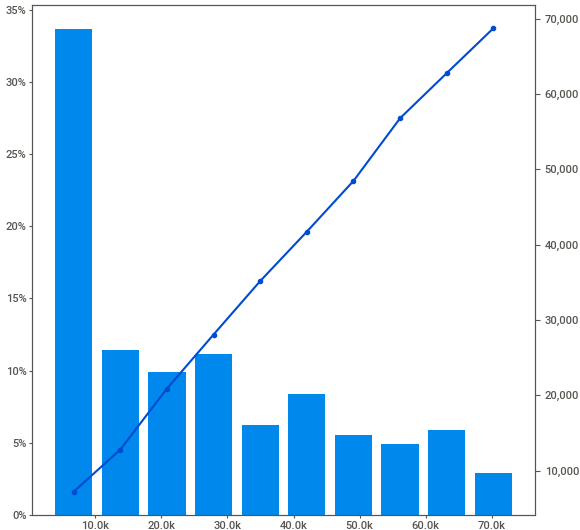
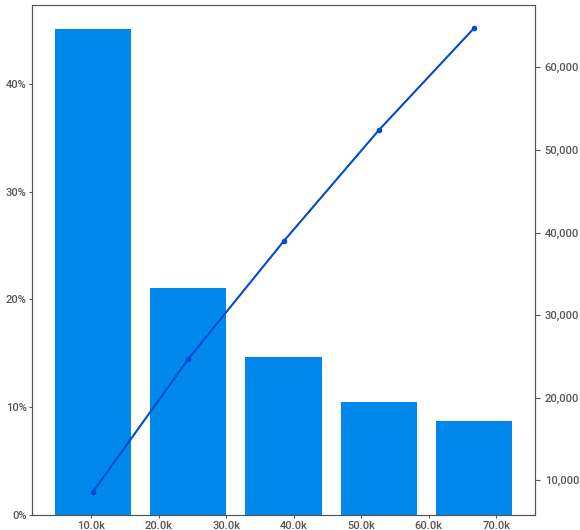
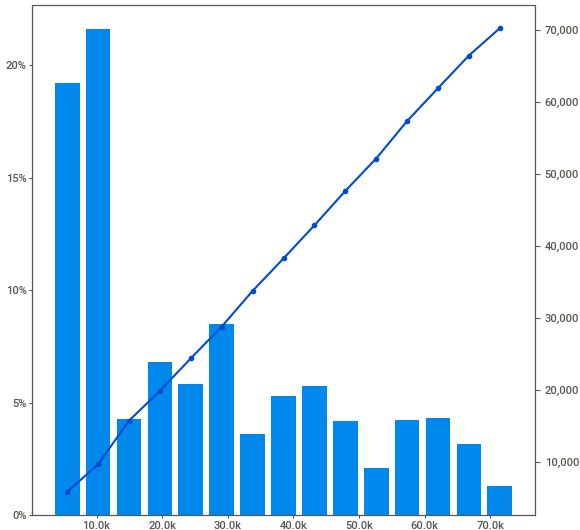
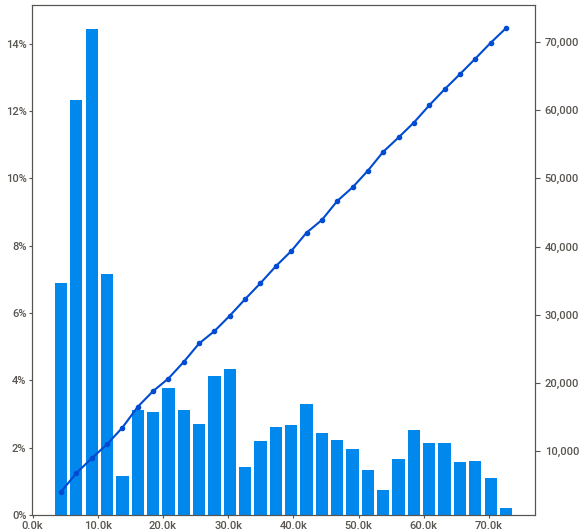
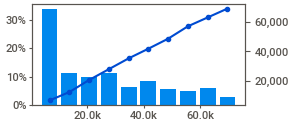
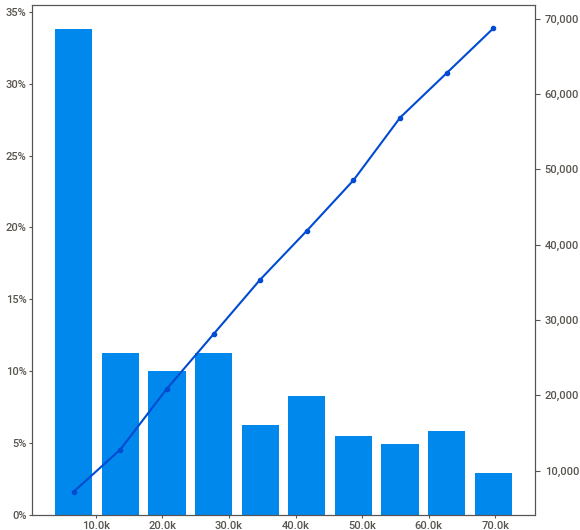
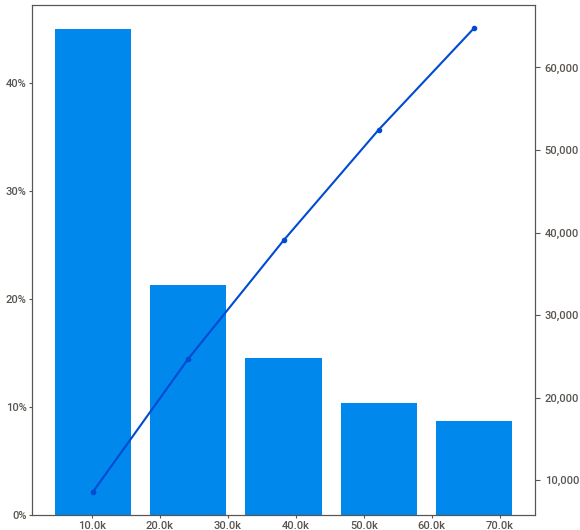
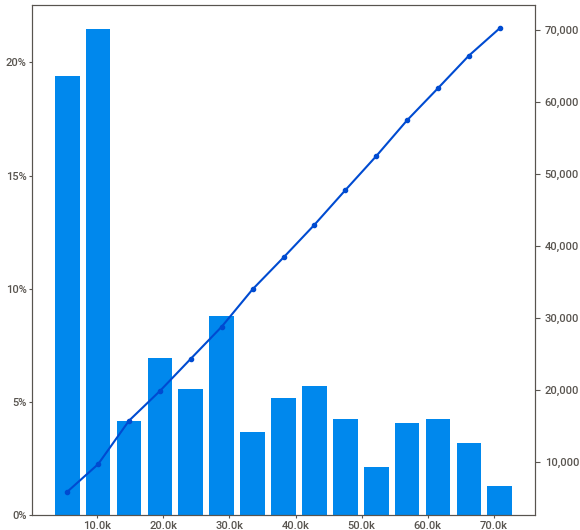
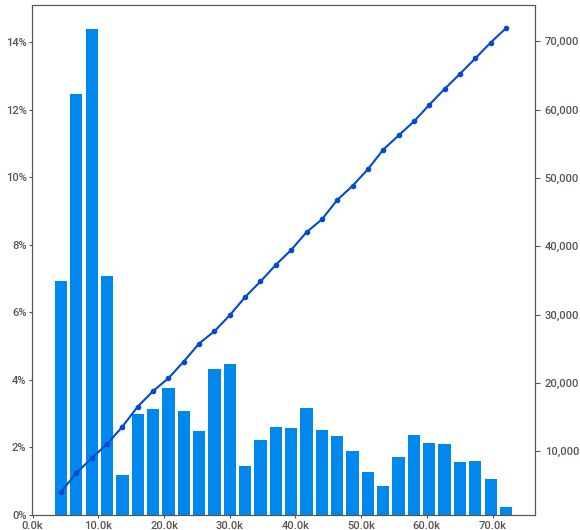
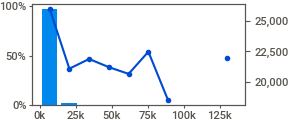
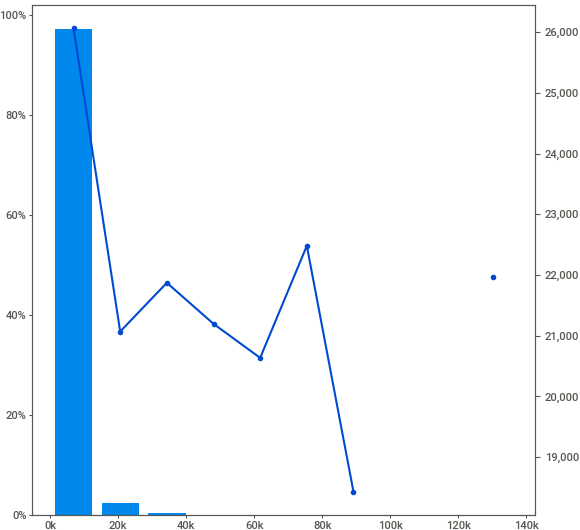
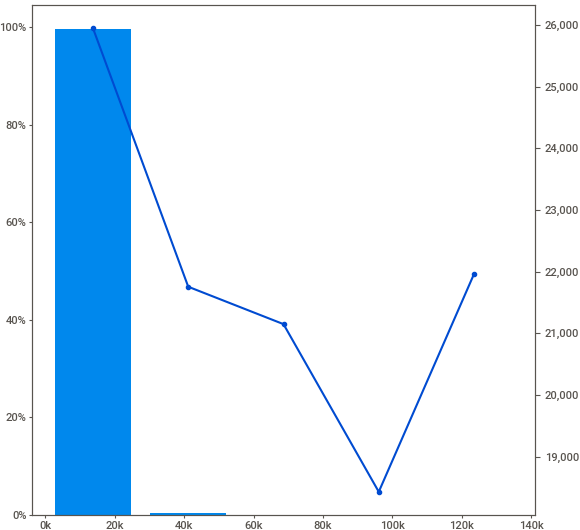
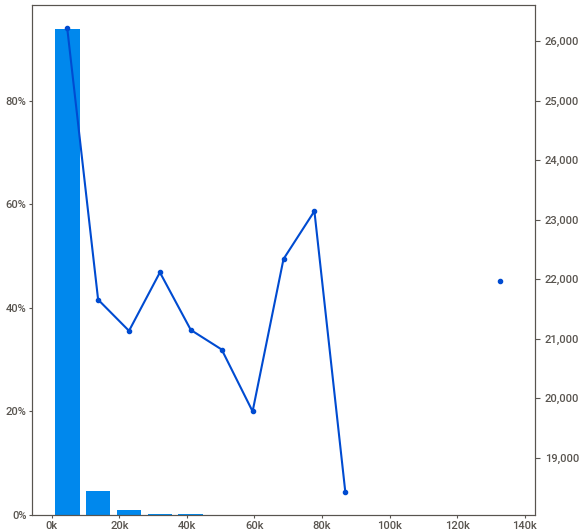
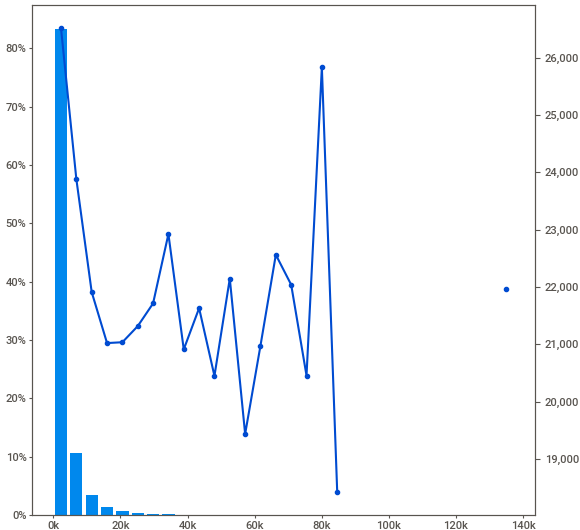
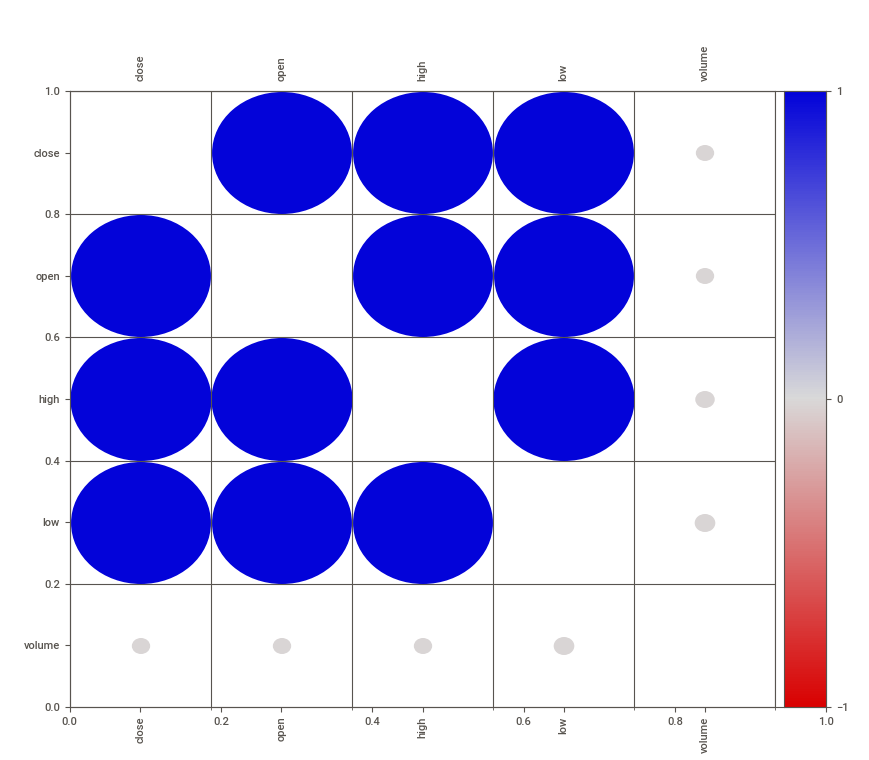
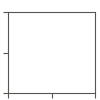

In [7]:
# 'close' 列をターゲット変数としてレポートを生成
report = sv.analyze(df, target_feat='close')
report.show_notebook()

In [8]:
AV = AutoViz_Class()
# 可視化の実行
df_viz = AV.AutoViz(
    filename="",               # ファイル名は空文字に設定（df を直接使用するため）
    sep=",",                   # データの区切り文字（通常はカンマ）
    depVar="",                 # 目的変数（ターゲット変数）の列名を指定（なければ空文字）
    dfte=df,                   # データフレームを直接指定
    header=0,                  # ヘッダーの行番号（通常は0）
    verbose=1,                 # 詳細な出力を表示
    lowess=False,              # Lowess 曲線を使用するか
    chart_format="svg",        # チャートの形式（svg, png など）
    max_rows_analyzed=150000,  # 分析する最大行数
    max_cols_analyzed=30,      # 分析する最大列数
    save_plot_dir=None         # プロットを保存するディレクトリ（None の場合は保存しない）
)
%matplotlib inline

Shape of your Data Set loaded: (58923, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    6 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['timestamp']
To fix these data quality issues in the dataset, import

Number of All Scatter Plots = 15
All Plots done
Time to run AutoViz = 5 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


Shape of your Data Set loaded: (58923, 6)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['timestamp']

################ Regression problem ##################

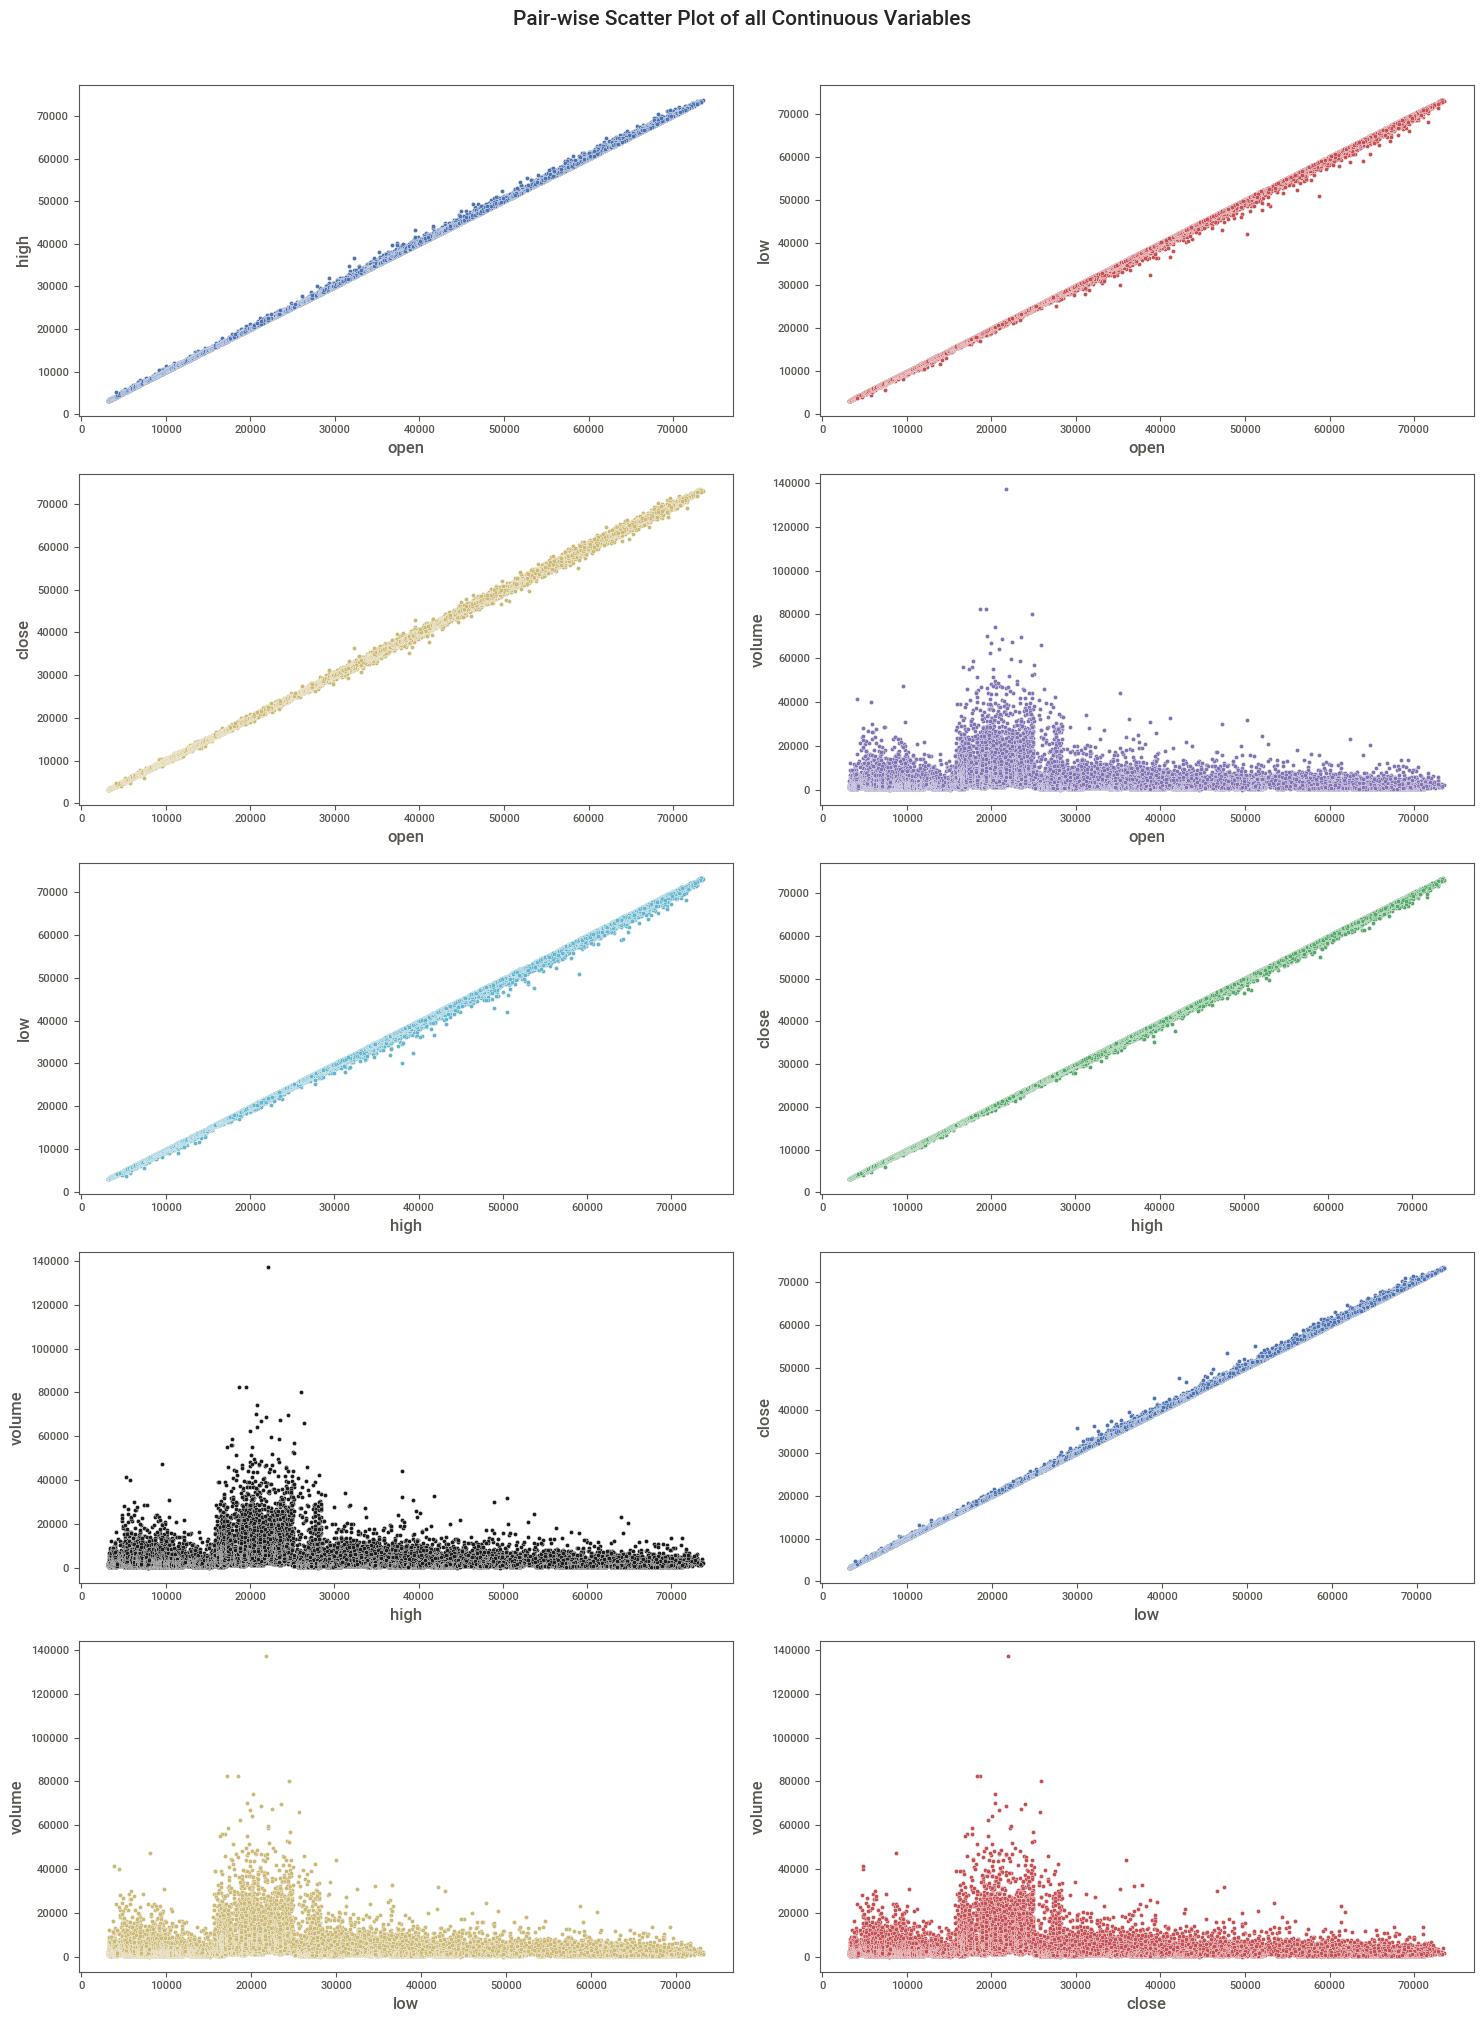

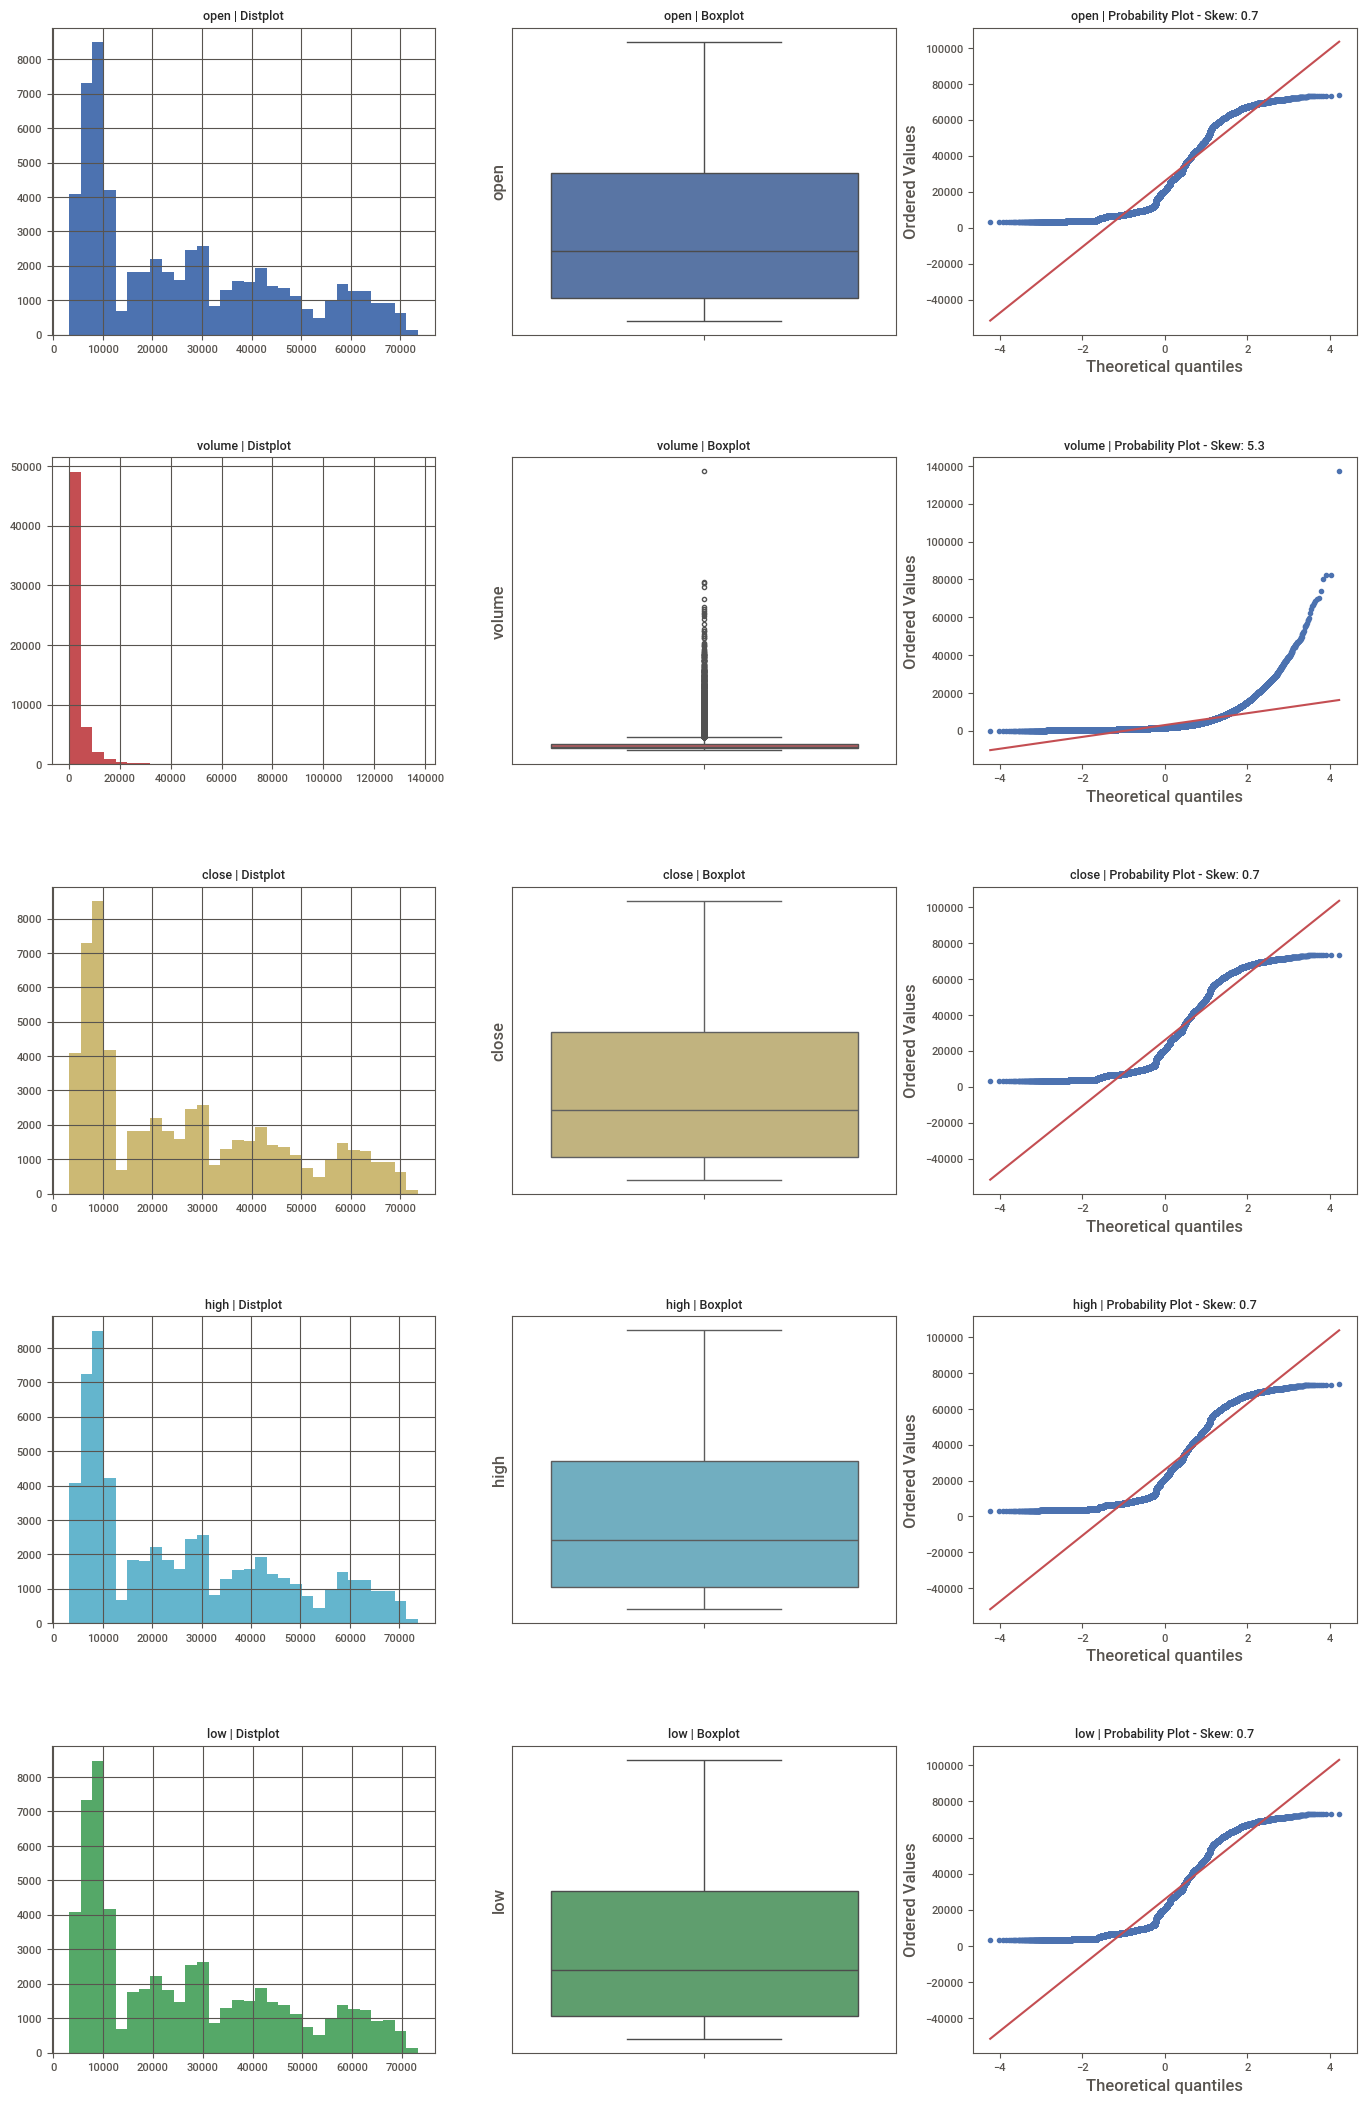

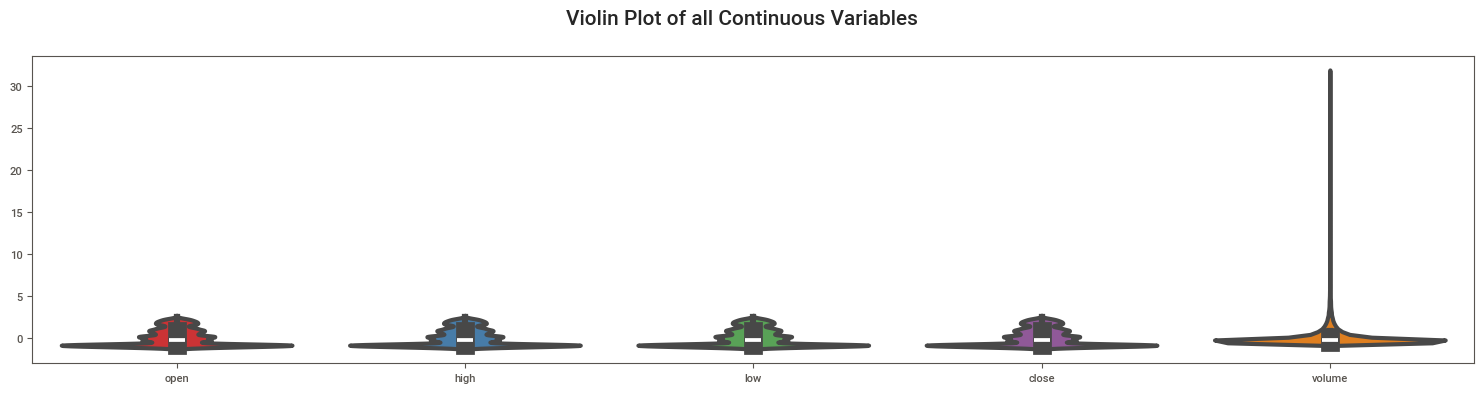

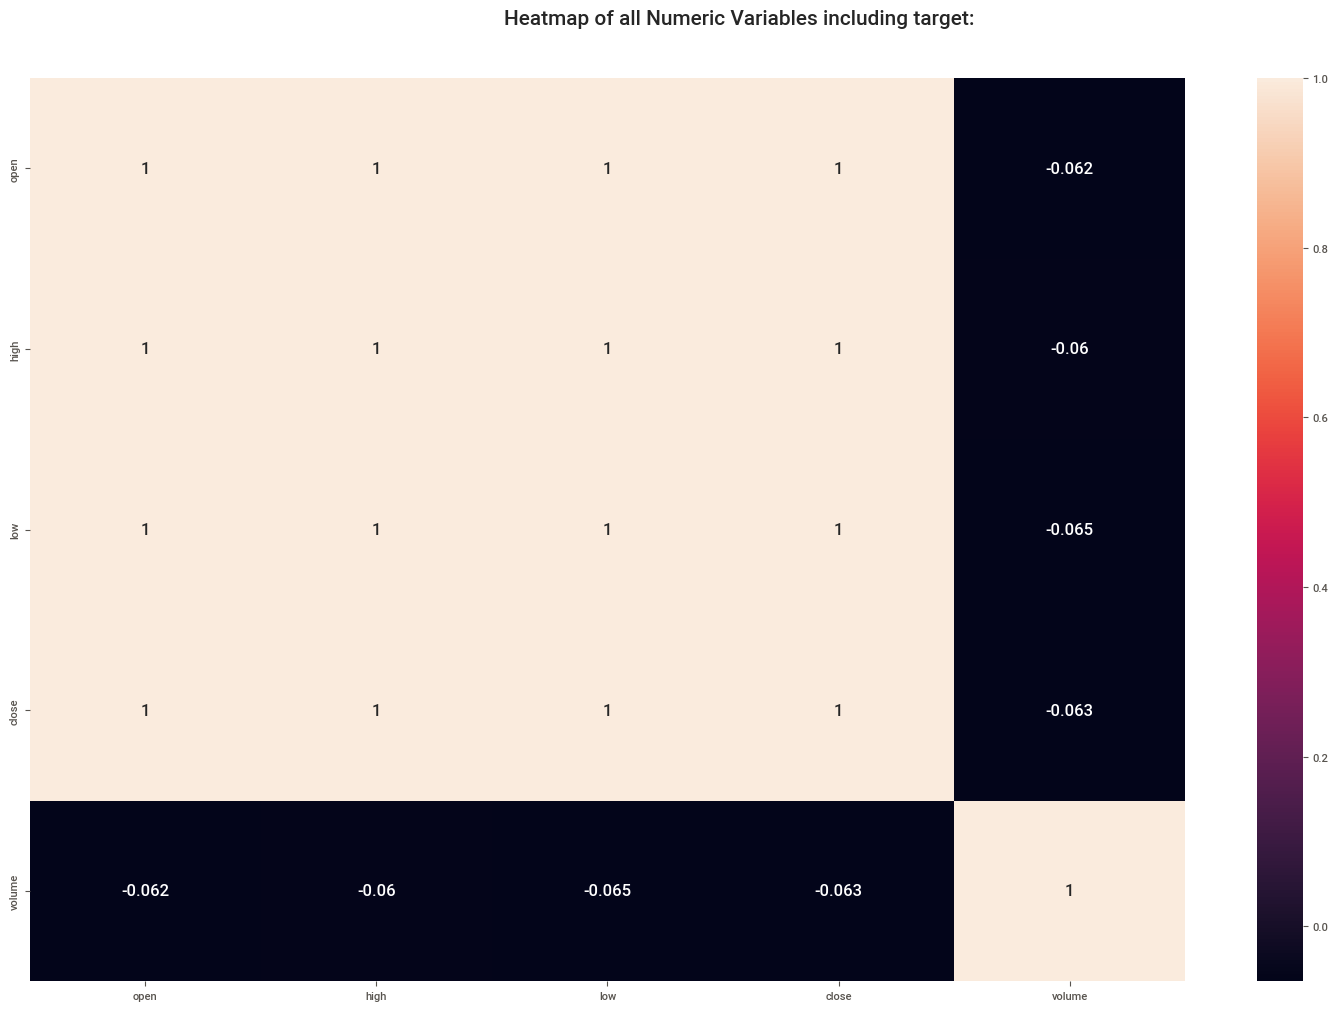

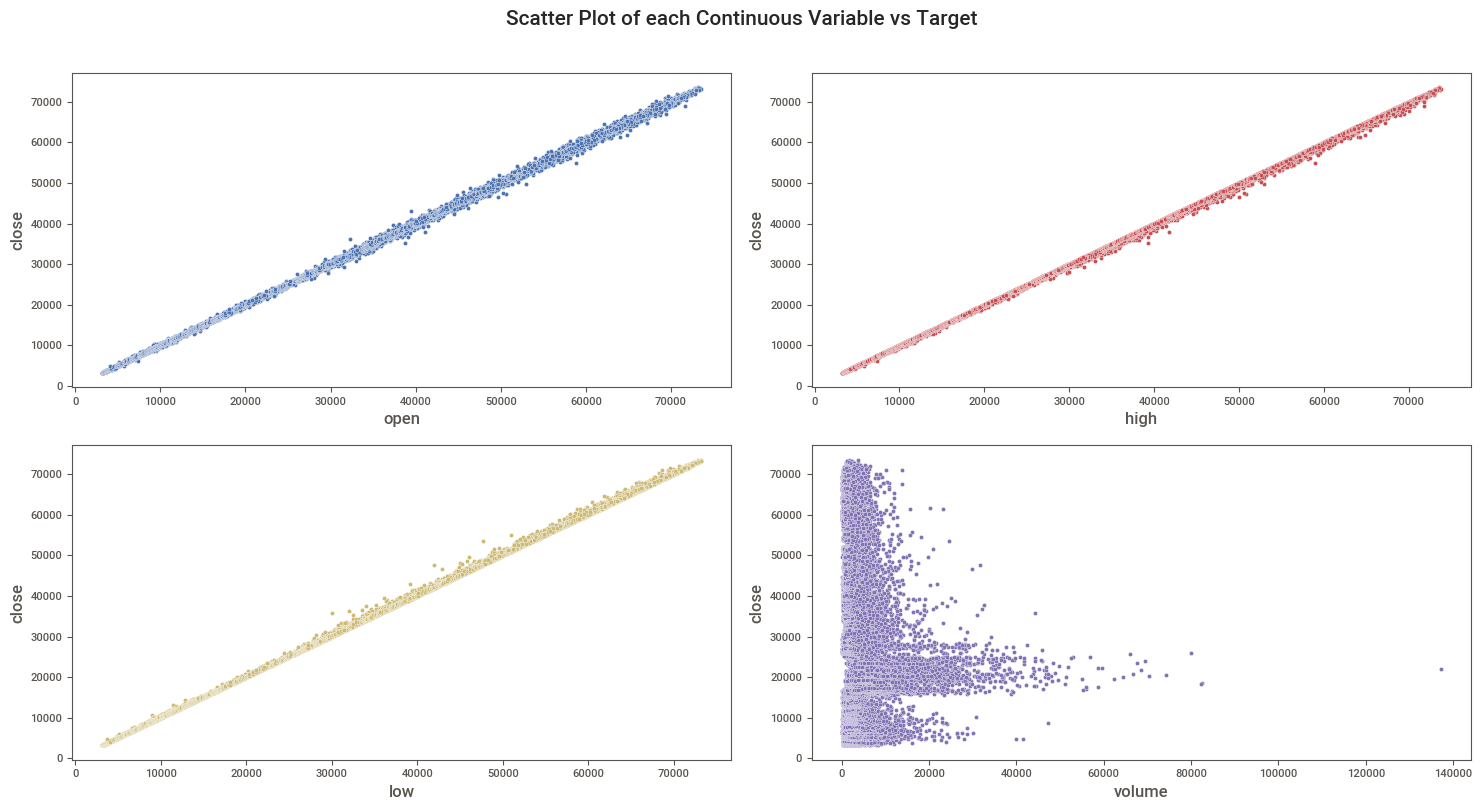

Number of All Scatter Plots = 10


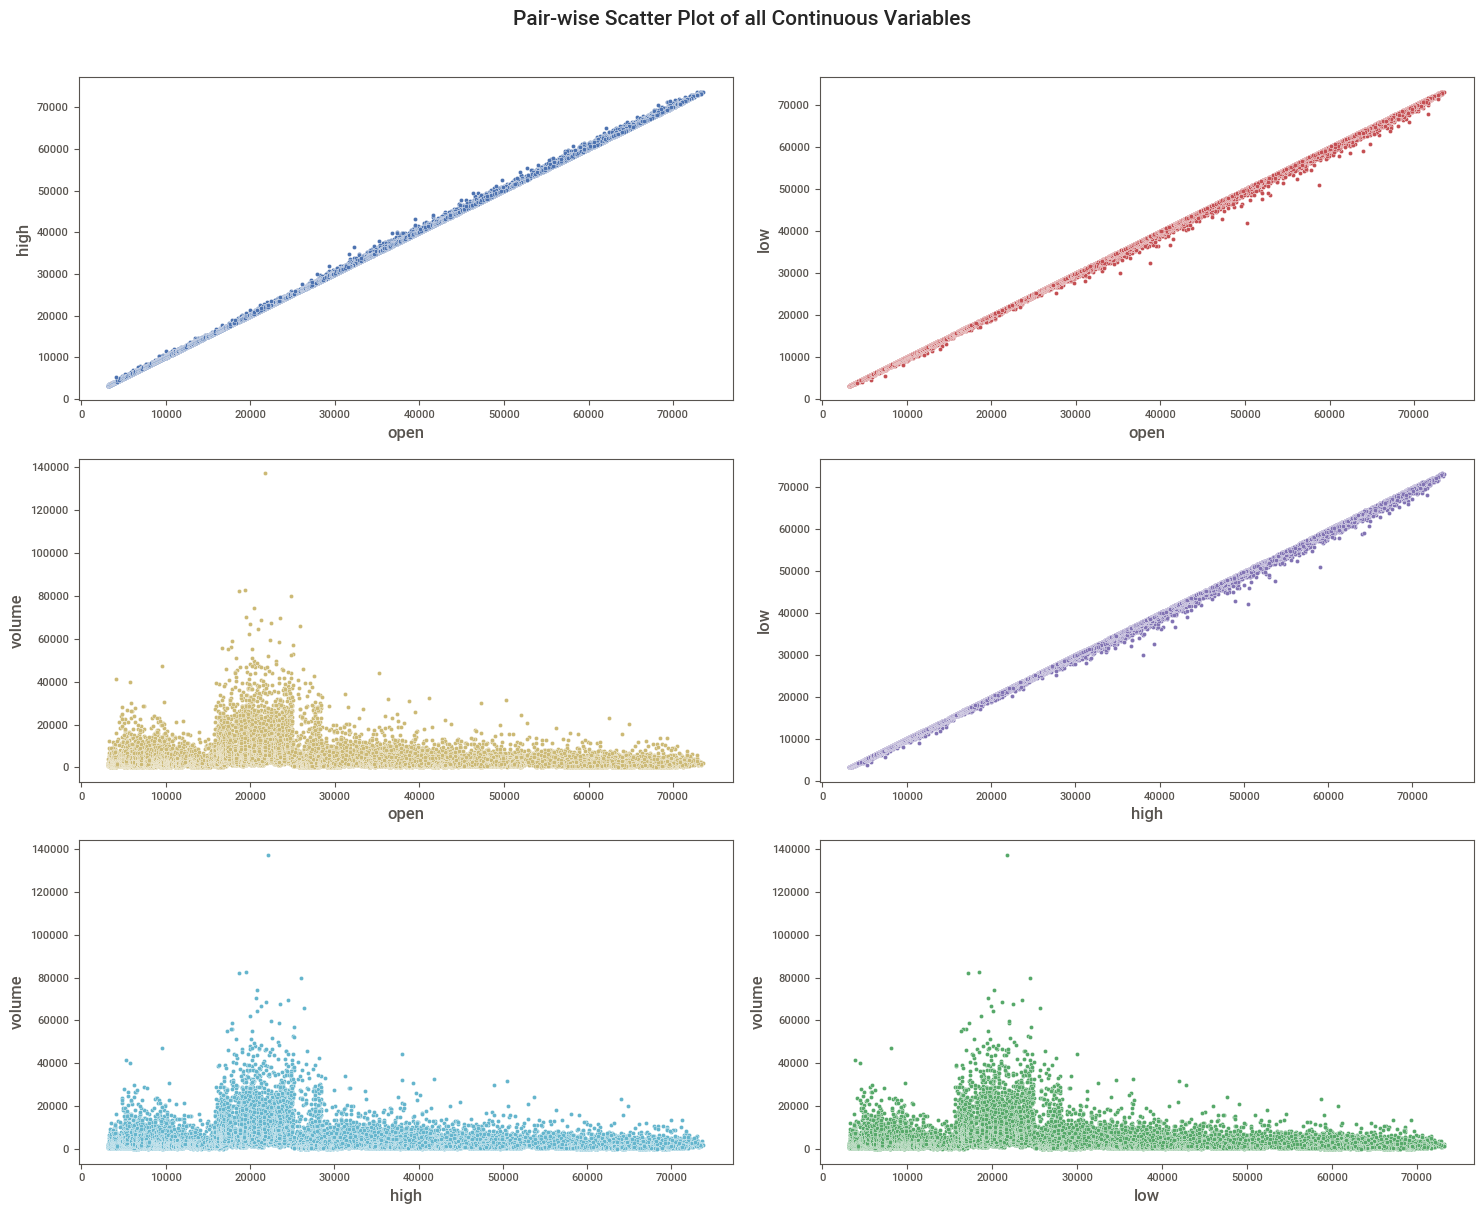

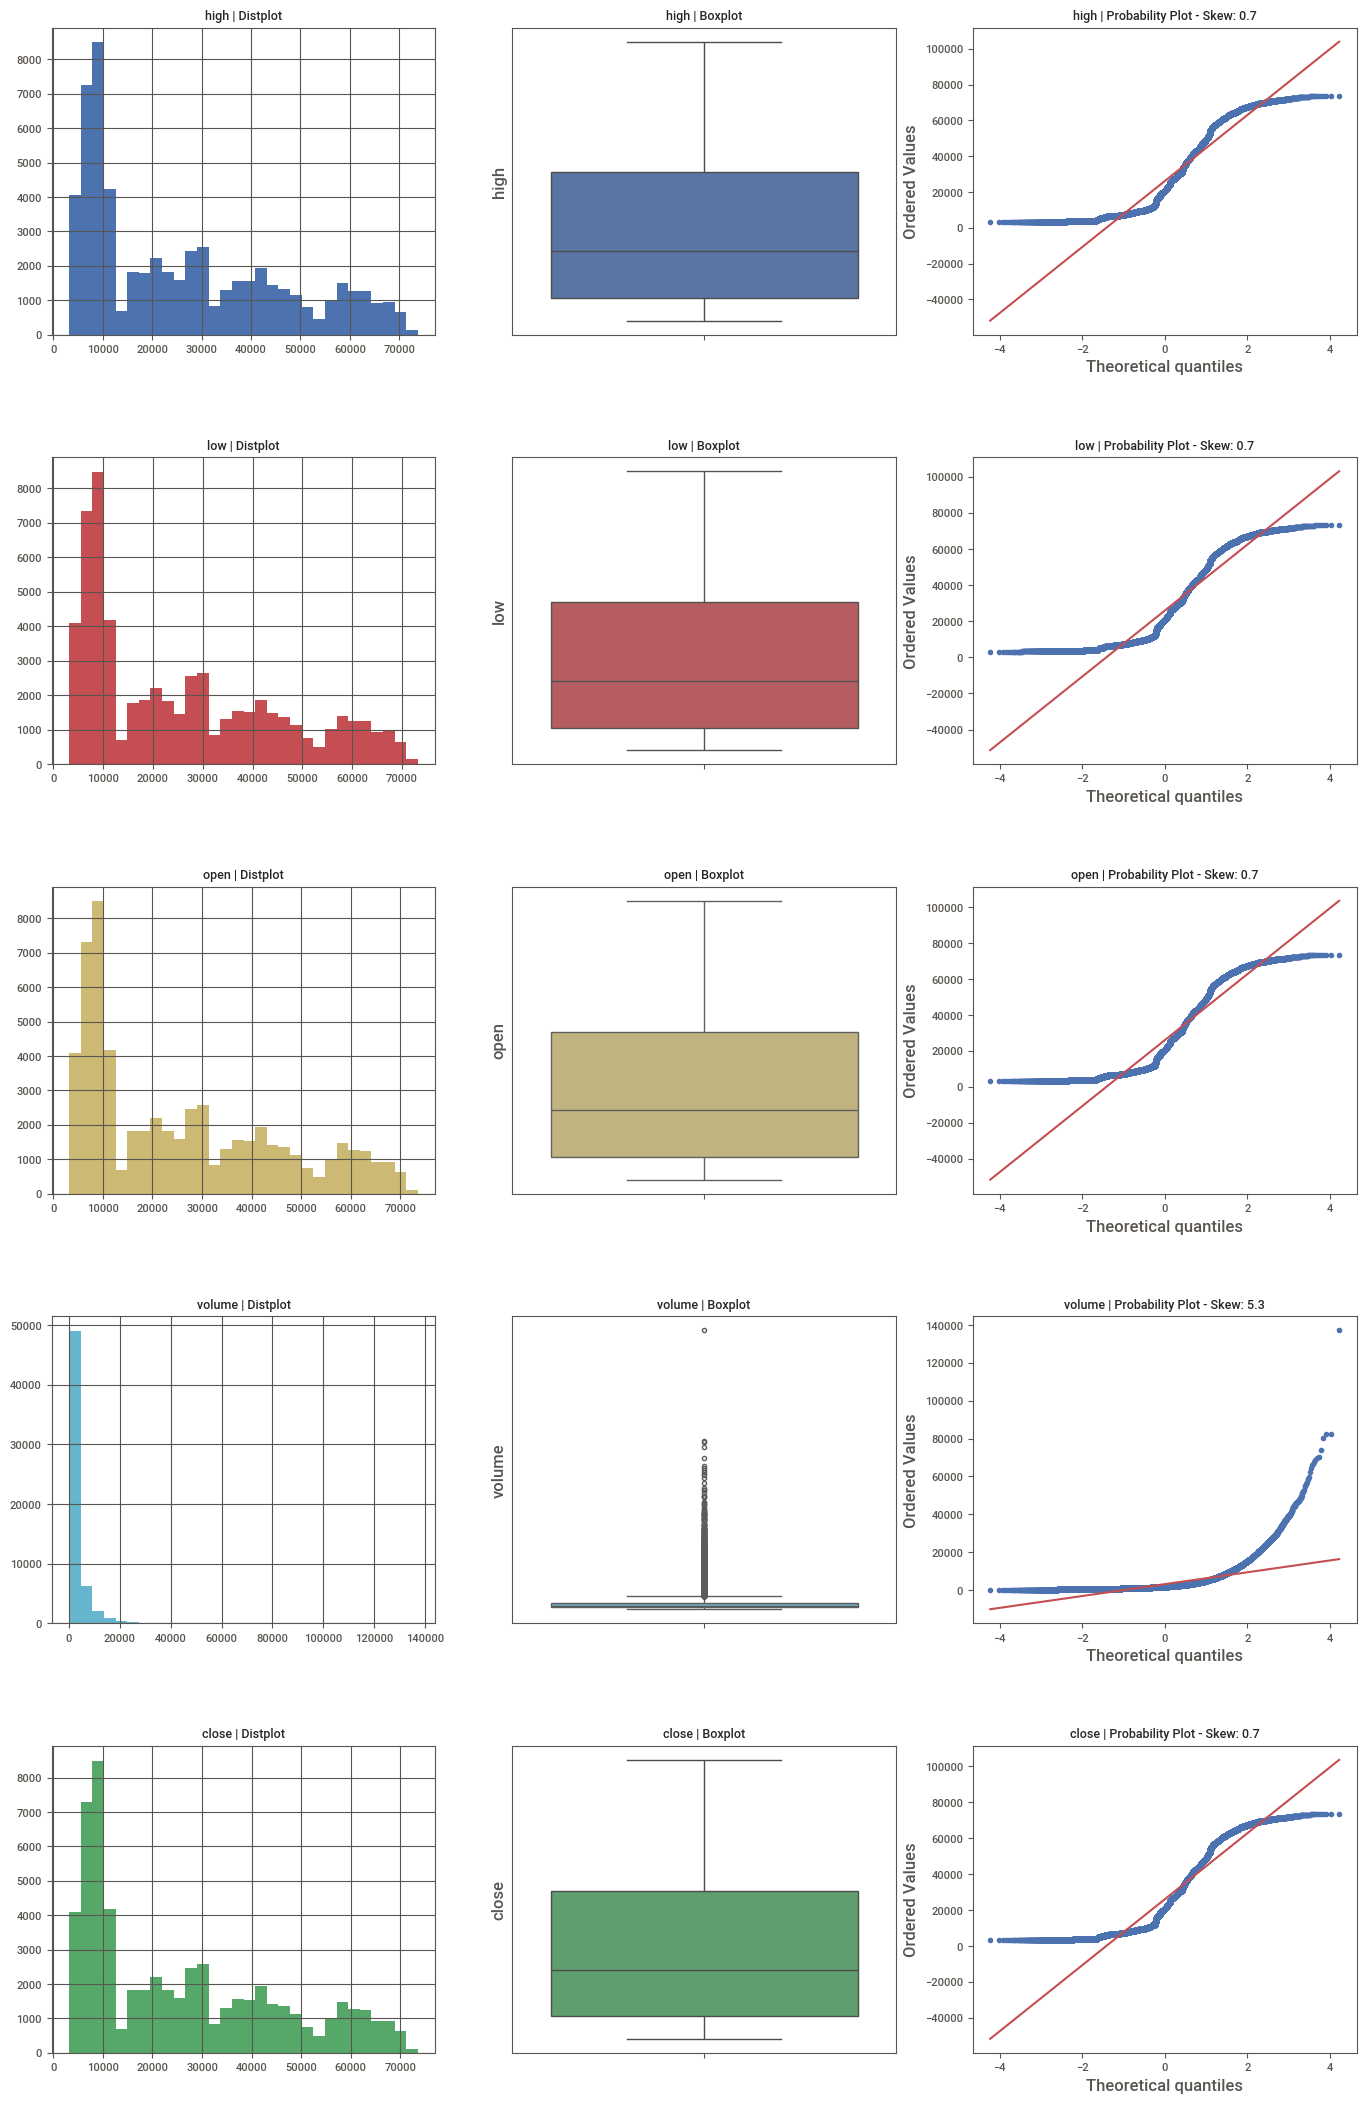

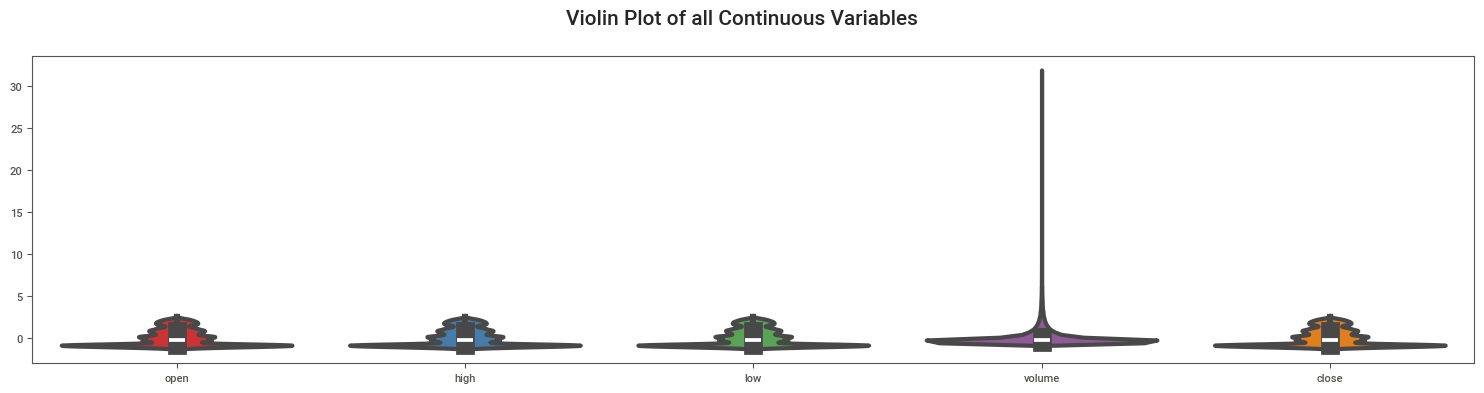

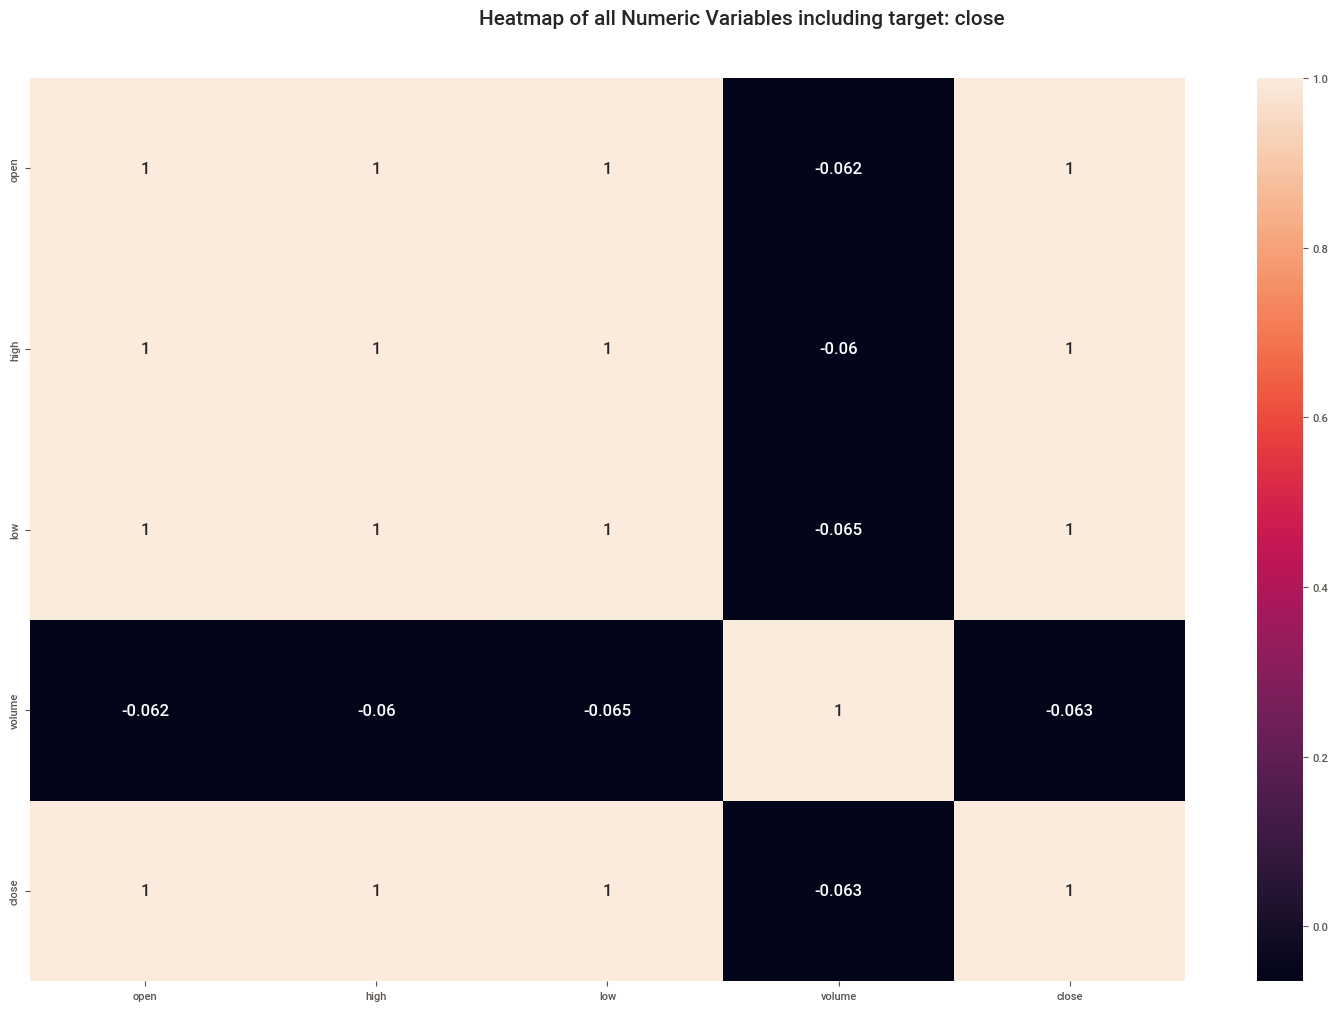

All Plots done
Time to run AutoViz = 10 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [9]:
# 目的変数を指定して可視化を実行
df_viz = AV.AutoViz(
    filename="",
    sep=",",
    depVar="close",  # 目的変数を指定
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
    save_plot_dir=None
)
%matplotlib inline

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10569.31
ROI: 5.69%
Total Trades: 755
Average Trades Per Day: 0.31


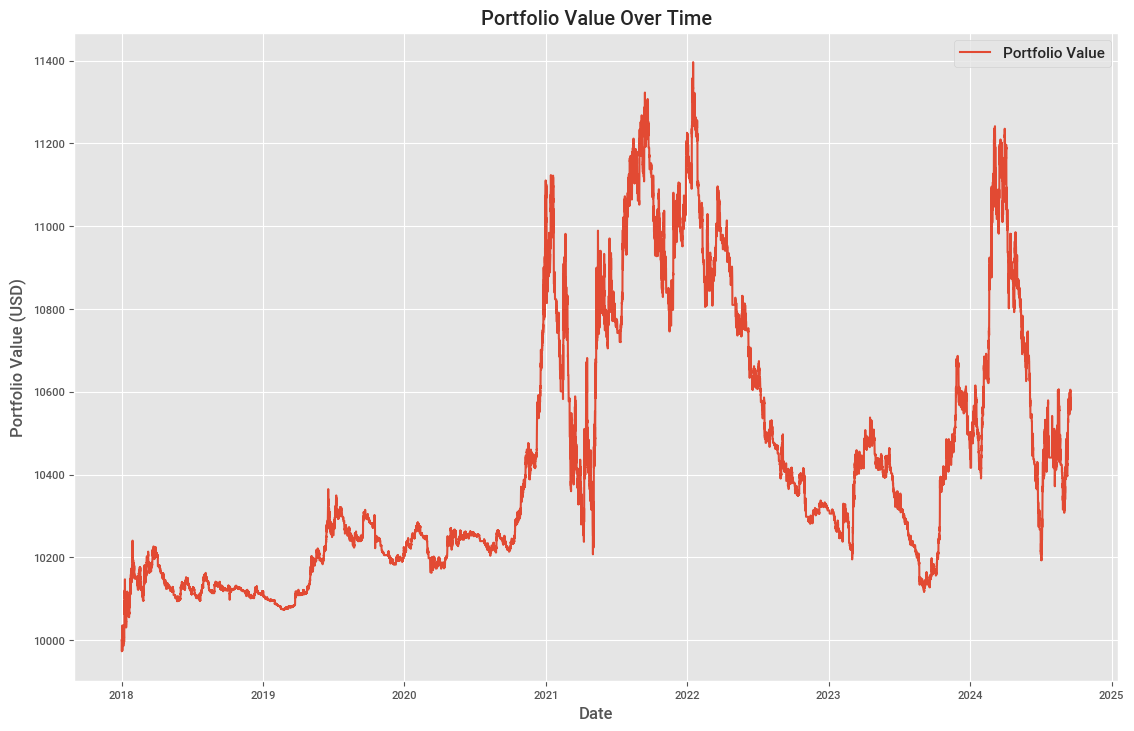

In [11]:
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

# CSVファイルを読み込む
data = pd.read_csv('btc_usdt_1h_2018_to_now.csv', parse_dates=['timestamp'])

# Backtrader用のデータフォーマットに変換
class PandasData(bt.feeds.PandasData):
    params = (
        ('datetime', 'timestamp'),
        ('open', 'open'),
        ('high', 'high'),
        ('low', 'low'),
        ('close', 'close'),
        ('volume', 'volume'),
    )

data_feed = PandasData(dataname=data)

# 反転したストラテジー
class ReversedSMACrossStrategy(bt.Strategy):
    params = (
        ('sma_short_period', 50),
        ('sma_long_period', 200),
        ('trade_size', 0.03),  # 取引サイズ
        ('stop_loss', 0.02),  # 2%のストップロス
        ('take_profit', 0.04)  # 4%のテイクプロフィット
    )

    def __init__(self):
        self.sma_short = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_short_period)
        self.sma_long = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.sma_long_period)
        self.bbands = bt.indicators.BollingerBands(self.data.close)
        self.portfolio_value = []
        self.trade_count = 0

    def log(self, txt, dt=None):
        ''' 日付付きでログを出力 '''
        dt = dt or self.datas[0].datetime.date(0)
        print(f'{dt.isoformat()} {txt}')

    def next(self):
        self.portfolio_value.append(self.broker.getvalue())  # ポートフォリオ値を記録

        # 反転したSMAクロスオーバーとボリンジャーバンドの組み合わせ
        if self.sma_short < self.sma_long:  # 下降トレンド（反転）
            if not self.position:
                if self.data.close > self.bbands.top:
                    self.buy(size=self.params.trade_size)  # 購入
                    self.trade_count += 1
                    #self.log(f'BUY CREATE, {self.data.close[0]:.2f}')
            elif self.position.size > 0:
                if self.data.close < self.bbands.bot:
                    self.sell(size=self.params.trade_size)  # ポジションを閉じる
                    self.trade_count += 1
                    #self.log(f'SELL CREATE, {self.data.close[0]:.2f}')
        elif self.sma_short > self.sma_long:  # 上昇トレンド（反転）
            if not self.position:
                if self.data.close < self.bbands.bot:
                    self.sell(size=self.params.trade_size)  # 売却
                    self.trade_count += 1
                    #self.log(f'SELL CREATE, {self.data.close[0]:.2f}')
            elif self.position.size < 0:
                if self.data.close > self.bbands.top:
                    self.buy(size=self.params.trade_size)  # ポジションを閉じる
                    self.trade_count += 1
                    #self.log(f'BUY CREATE, {self.data.close[0]:.2f}')

        # ストップロスとテイクプロフィットの設定
        for order in self.broker.orders:
            if order.status == order.Accepted:
                if order.isbuy():
                    sl_price = order.executed.price * (1 - self.params.stop_loss)
                    tp_price = order.executed.price * (1 + self.params.take_profit)
                    self.sell(size=order.size, exectype=bt.Order.Stop, price=sl_price)
                    self.sell(size=order.size, exectype=bt.Order.Limit, price=tp_price)
                elif order.issell():
                    sl_price = order.executed.price * (1 + self.params.stop_loss)
                    tp_price = order.executed.price * (1 - self.params.take_profit)
                    self.buy(size=order.size, exectype=bt.Order.Stop, price=sl_price)
                    self.buy(size=order.size, exectype=bt.Order.Limit, price=tp_price)

# バックテストの実行
if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.adddata(data_feed)
    cerebro.addstrategy(ReversedSMACrossStrategy)
    initial_cash = 10000  # 初期資金
    cerebro.broker.setcash(initial_cash)

    # 手数料の設定
    cerebro.broker.setcommission(commission=0.001)  # 0.1%の手数料

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    result = cerebro.run()
    final_value = cerebro.broker.getvalue()
    print('Final Portfolio Value: %.2f' % final_value)

    # ROIの計算
    roi = ((final_value - initial_cash) / initial_cash) * 100
    print(f'ROI: {roi:.2f}%')

    # 取引回数と一日の平均取引回数の計算
    strategy = result[0]
    trade_count = strategy.trade_count
    total_days = (data['timestamp'].iloc[-1] - data['timestamp'].iloc[0]).days
    avg_trades_per_day = trade_count / total_days
    print(f'Total Trades: {trade_count}')
    print(f'Average Trades Per Day: {avg_trades_per_day:.2f}')

    # グラフのカスタマイズ
    style.use('ggplot')
    
    # 損益グラフをプロット
    portfolio_values = strategy.portfolio_value
    dates = data['timestamp'][:len(portfolio_values)]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.plot(dates, portfolio_values, label='Portfolio Value')
    ax.set_title('Portfolio Value Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Portfolio Value (USD)')
    ax.legend()
    ax.grid(True)
    
    plt.show()



# 特徴量作成

In [14]:
# 移動平均を計算
df['SMA_10'] = df['close'].rolling(window=10).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()

# 前日比を計算
df['price_diff'] = df['close'].diff()

# RSIの計算
def calculate_rsi(data, window):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['close'], 14)

# データ分割

In [16]:
train_size = int(len(df) * 0.8)  # 80%をトレーニングデータ
train_data = df[:train_size]
test_data = df[train_size:]

# 特徴量とターゲットの分離

In [17]:
X_train = train_data[['SMA_10', 'SMA_50', 'price_diff', 'RSI']]  # 特徴量を選択
y_train = train_data['close']  # ターゲットは終値
X_test = test_data[['SMA_10', 'SMA_50', 'price_diff', 'RSI']]
y_test = test_data['close']

# LightGBMのモデル作成と学習

In [21]:
# 必要なコールバックをインポート
from lightgbm import early_stopping

# LightGBMのデータセット形式に変換
train_data_lgb = lgb.Dataset(X_train, label=y_train)
valid_data_lgb = lgb.Dataset(X_test, label=y_test, reference=train_data_lgb)

# パラメータ設定
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# モデルを学習
model = lgb.train(
    params, 
    train_data_lgb, 
    num_boost_round=1000, 
    valid_sets=[valid_data_lgb],  # 検証データを指定
    callbacks=[early_stopping(stopping_rounds=50)]  # early_stoppingのコールバックを設定
)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[870]	valid_0's rmse: 1348.29


# モデルの評価

In [22]:
# 予測を実行
y_pred = model.predict(X_test)

# 評価指標を計算（RMSE）
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 1348.2936594014427


# 結果の可視化

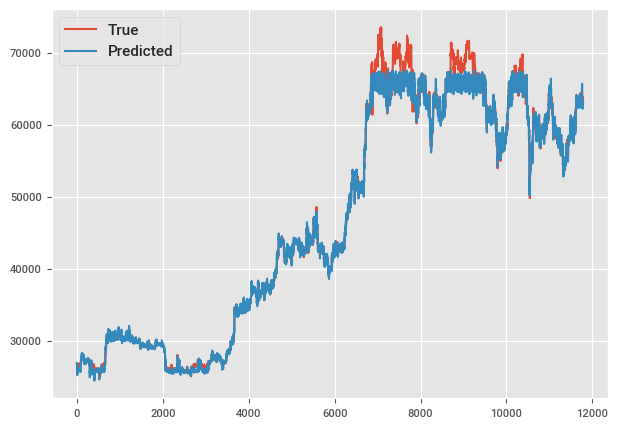

In [23]:
plt.plot(y_test.values, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()